In [1]:
# Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('train.csv')

data.head(1)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  

[1 rows x 81 columns]

In [2]:
# Shape of the training data

print(data.shape)

(1460, 81)


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Pre-Processing

In [46]:
# Handling Missing values

print("Percentage of Null values in each column: ")
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col, data[col].isna().sum()/len(data[col])*100)

Percentage of Null values in each column: 
LotFrontage 17.73972602739726
Alley 93.76712328767123
MasVnrType 0.547945205479452
MasVnrArea 0.547945205479452
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinType2 2.6027397260273974
Electrical 0.0684931506849315
FireplaceQu 47.26027397260274
GarageType 5.5479452054794525
GarageYrBlt 5.5479452054794525
GarageFinish 5.5479452054794525
GarageQual 5.5479452054794525
GarageCond 5.5479452054794525
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


### Finding the relationship between missing values and Sales Price

In [47]:
def relationship(col):

    dataset = data.copy()

    dataset[col] = dataset['LotFrontage'].isna().astype(int)

    dataset.groupby(col)['SalePrice'].median().plot.bar()

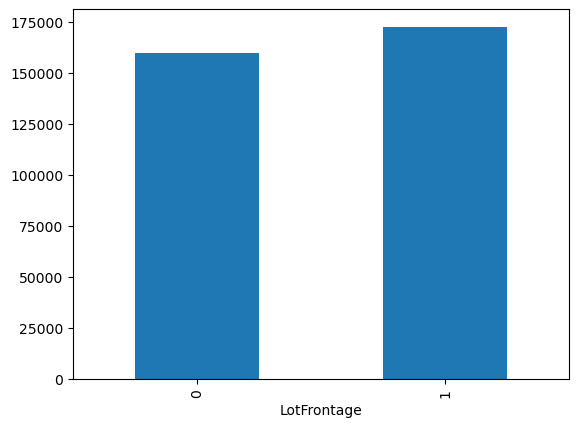

In [48]:
relationship('LotFrontage')

<p>Here we can see the relationship between each column and sales prices. we can replace all the null values from the respected columns with some meaning ful data we will do that in Feature Engineering</p>

In [49]:
# Data that not contains any objects
numerical_data = data.select_dtypes(exclude='object')
numerical_data.head(1)

len(numerical_data.columns)

38

out of 81 columns from the data there are 37 columns which are numerical

### Let's see the relationship between Year and Sales Price

Text(0.5, 1.0, 'House Price vs Year Sold')

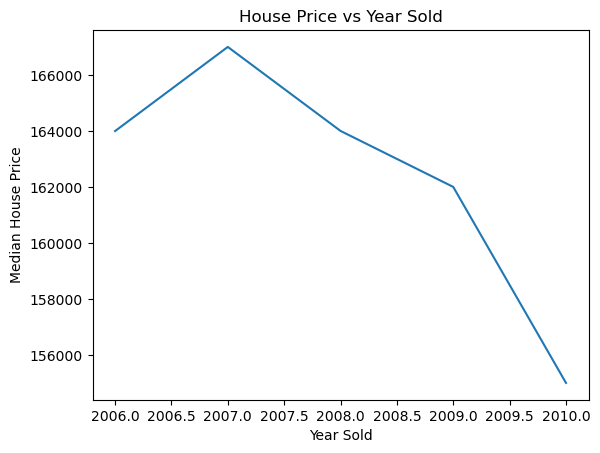

In [50]:
data.groupby('YrSold')['SalePrice'].median().plot()

plt.xlabel('Year Sold')
plt.ylabel('Median House Price')

plt.title('House Price vs Year Sold')

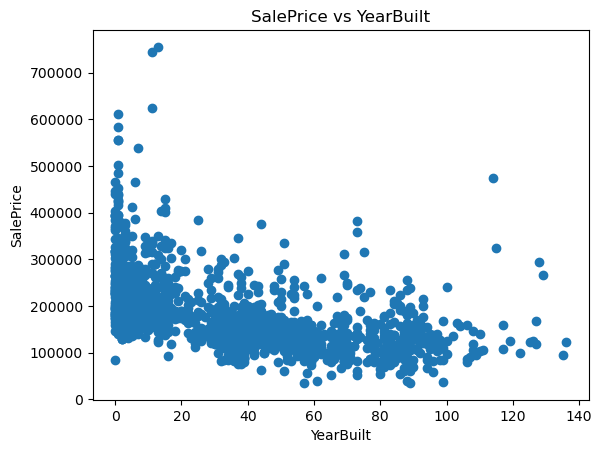

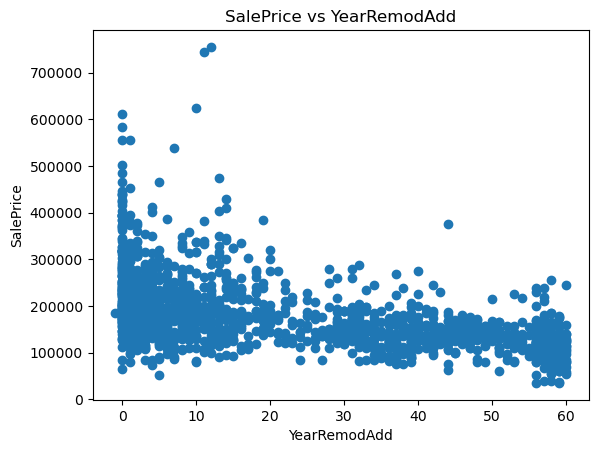

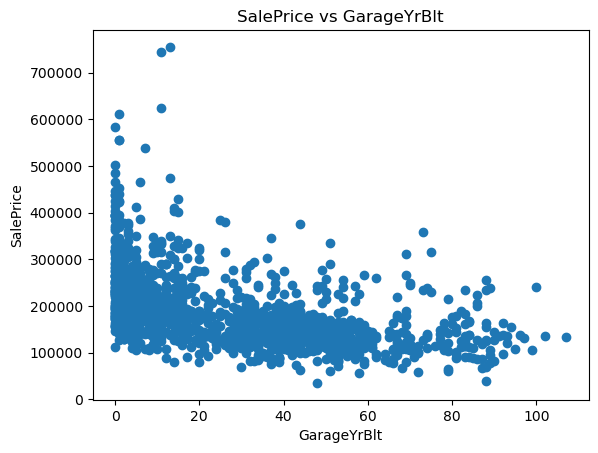

In [51]:
yearList = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for year in yearList:
    dataset = data.copy()

    if year != 'YrSold':
        dataset[year] = dataset['YrSold'] - dataset[year]
        plt.scatter(dataset[year], data['SalePrice'])
        plt.xlabel(year)
        plt.ylabel('SalePrice')
        plt.title('SalePrice vs '+year)
        plt.show()

From the above image the more the years the less the sales price, incase of the remodification the more years more house has been gone for remodificaton we can see it from salesprice vs yearremodadd

In [52]:
descrete_col = [col for col in numerical_data.columns if len(data[col].unique()) < 25 and col not in yearList]

print(descrete_col)
print("length of the descrete columns: ", len(descrete_col))


['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
length of the descrete columns:  17


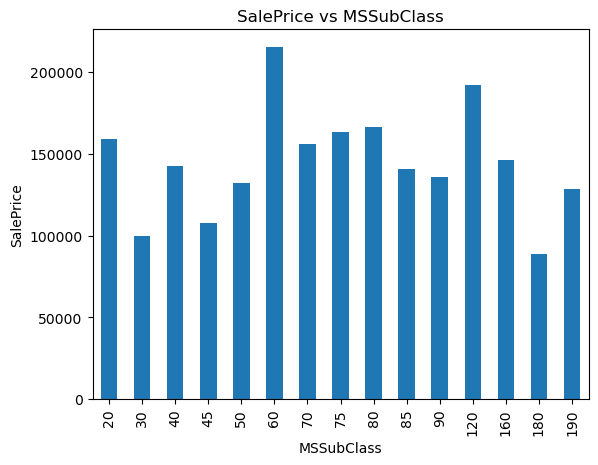

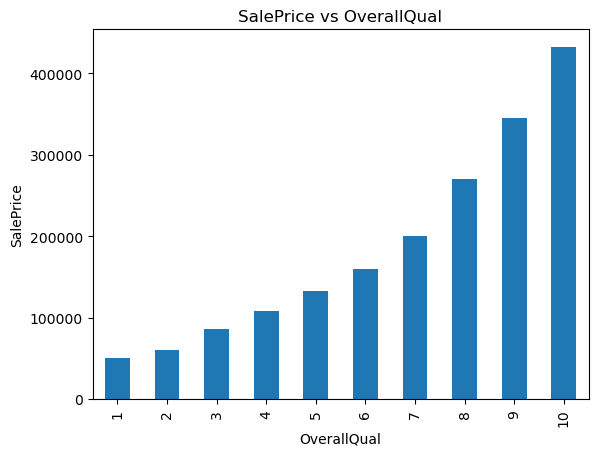

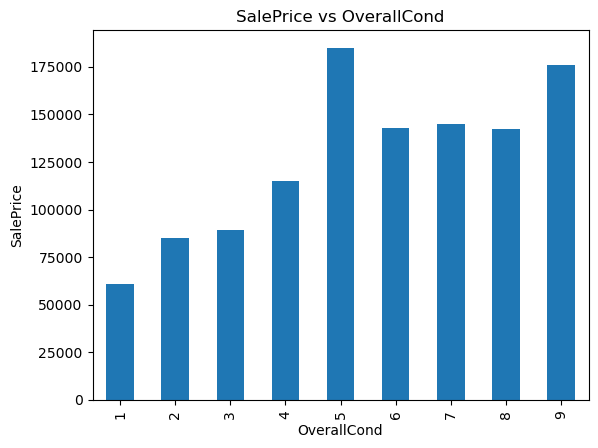

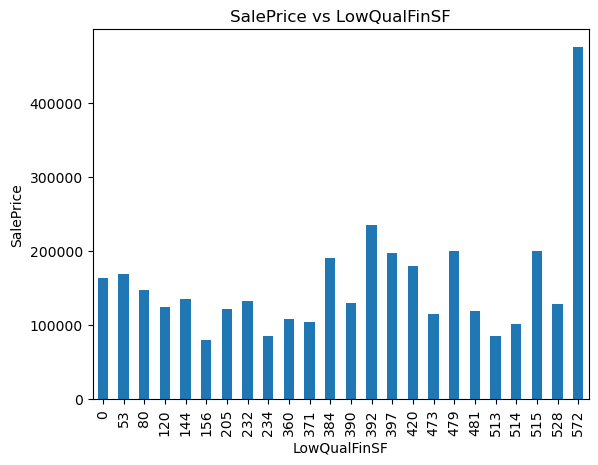

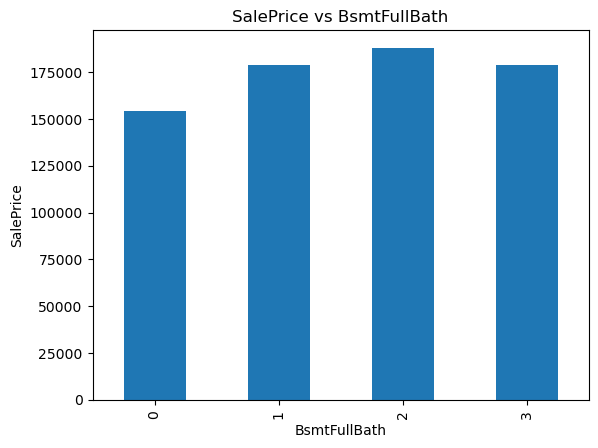

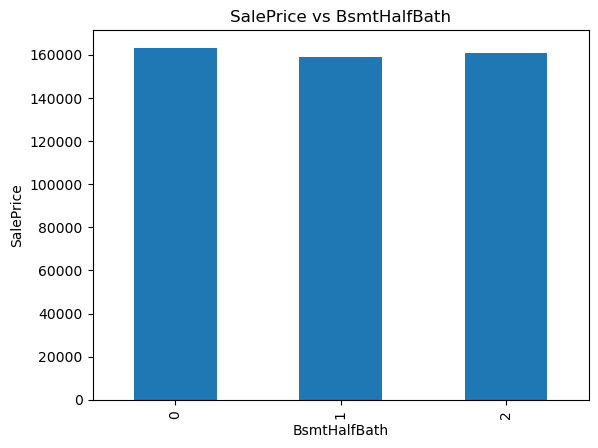

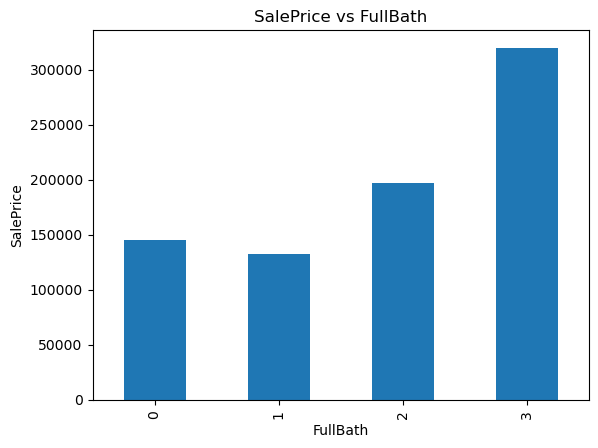

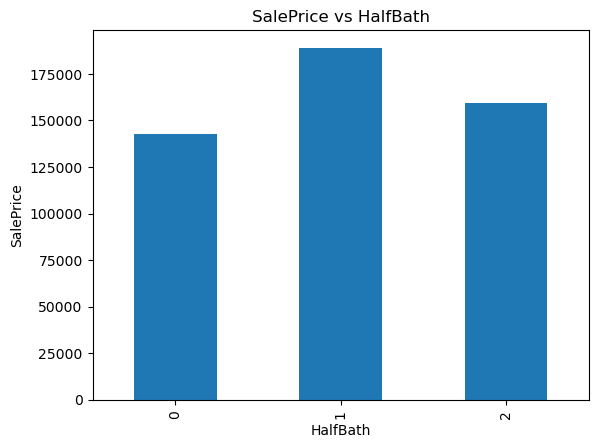

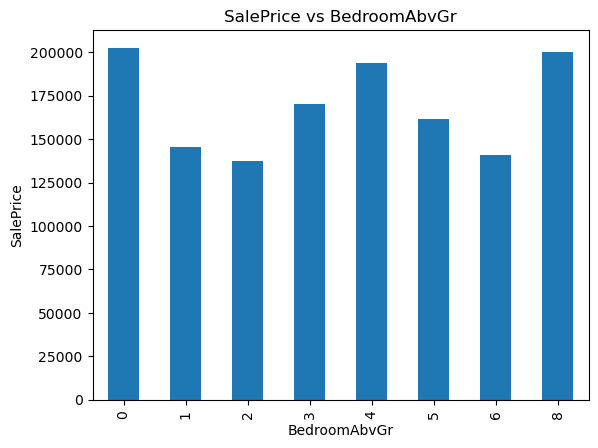

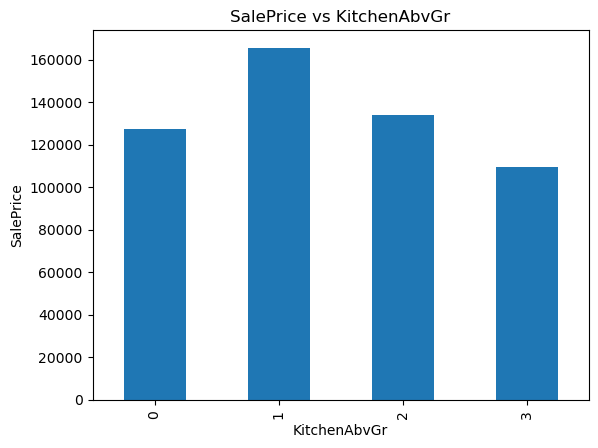

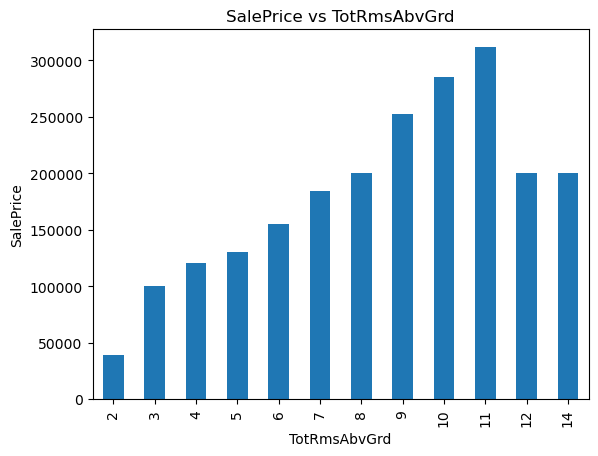

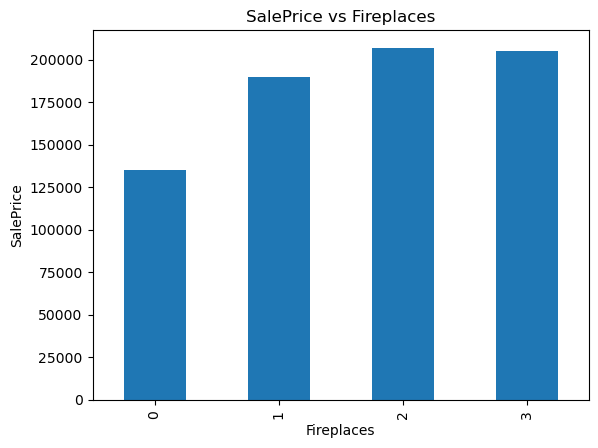

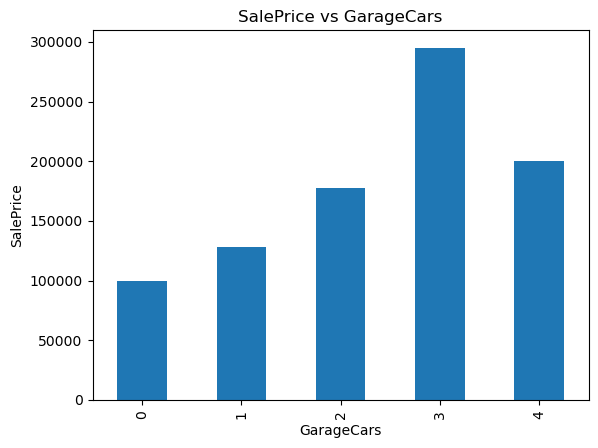

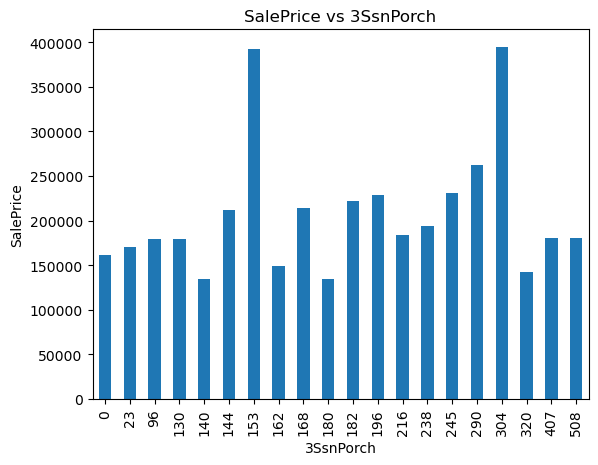

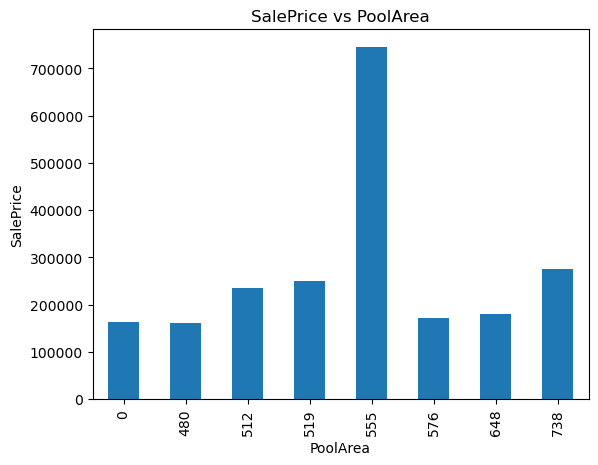

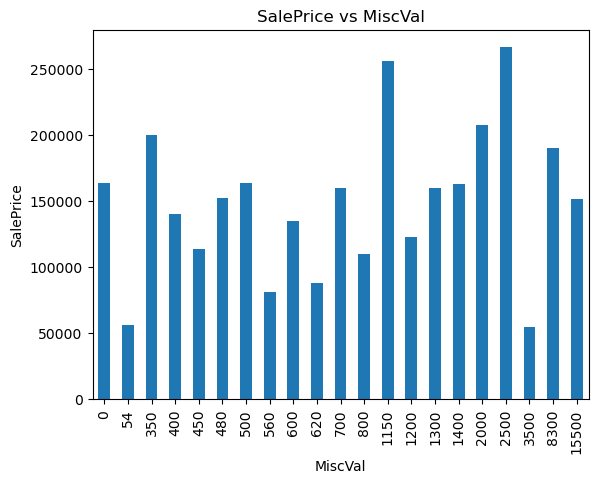

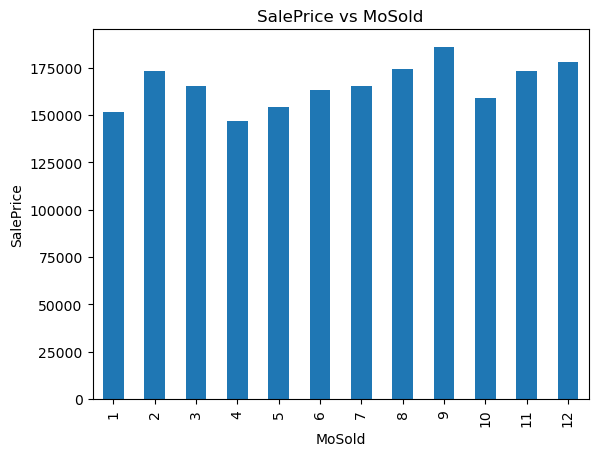

In [53]:
for col in descrete_col:
    dataset = data.copy()

    dataset.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')

    plt.title('SalePrice vs '+col)

    plt.show()



### Continuous Variable

In [54]:
continuous_col = [col for col in numerical_data.columns if col not in descrete_col and col not in yearList]

print(continuous_col)
print("length of the continuous columns: ", len(continuous_col))

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
length of the continuous columns:  17


In [55]:
# check if we have string values in the continuous columns

for col in continuous_col:
    for val in data[col]:
        if type(val) == str:
            print(col, val)

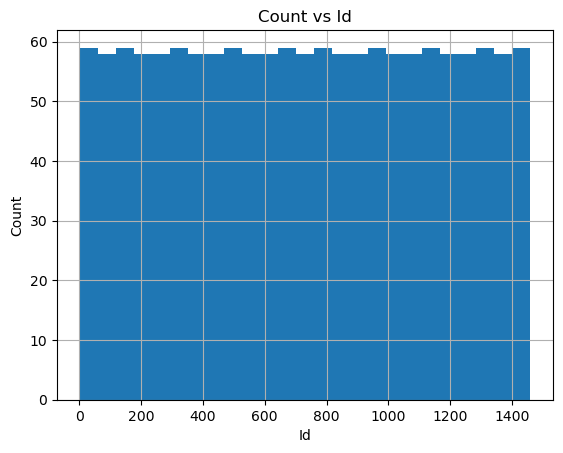

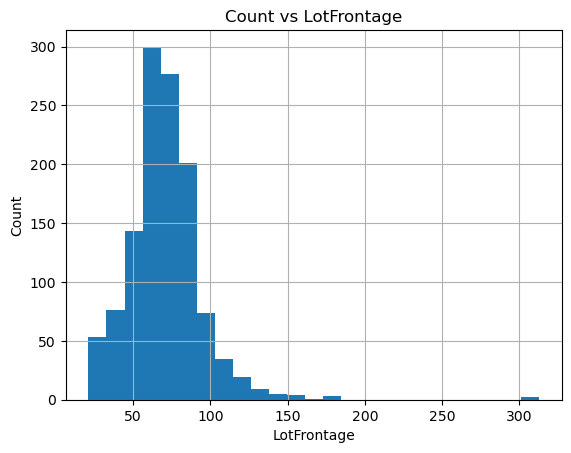

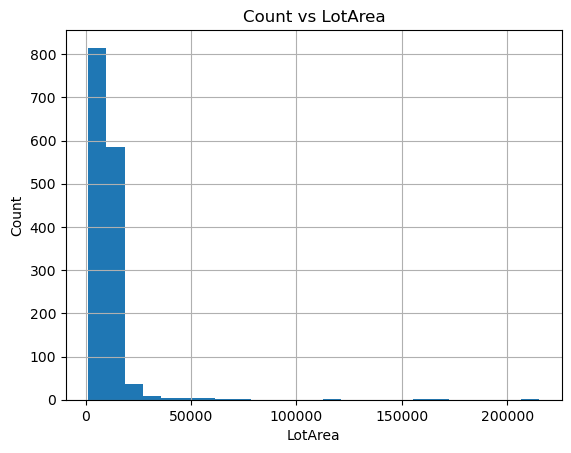

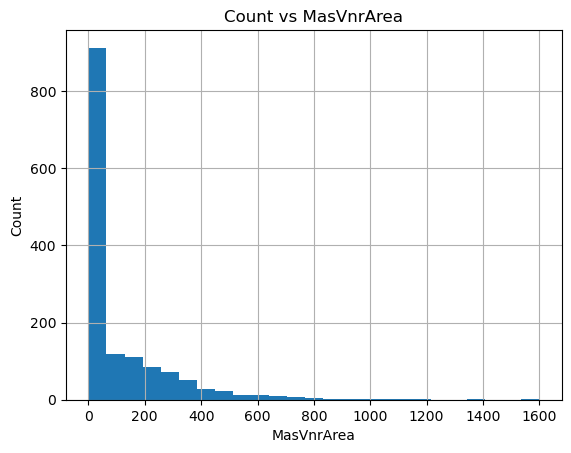

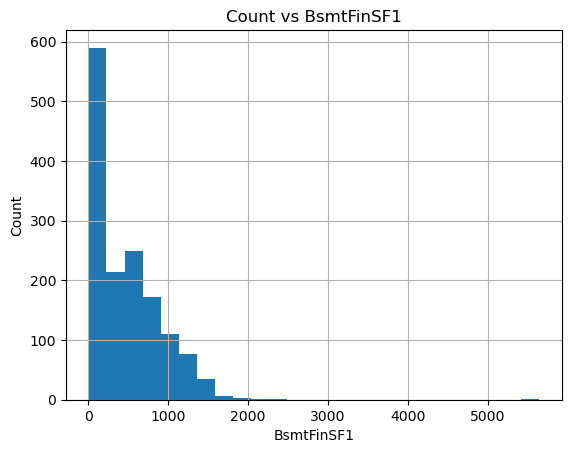

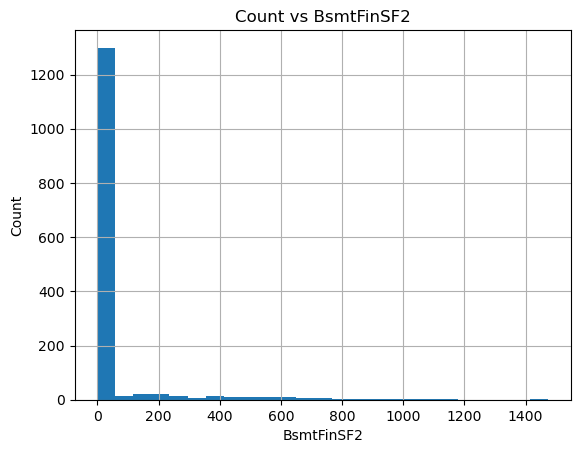

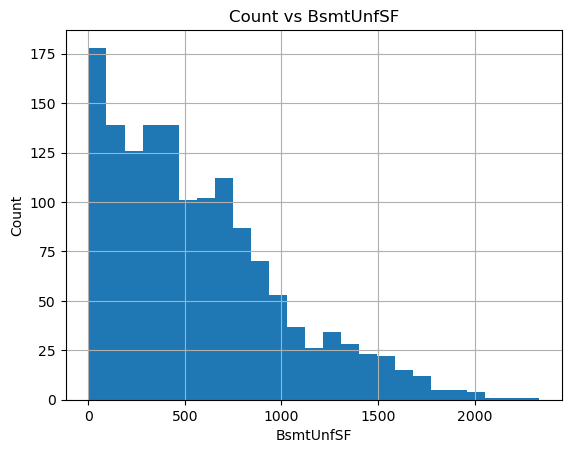

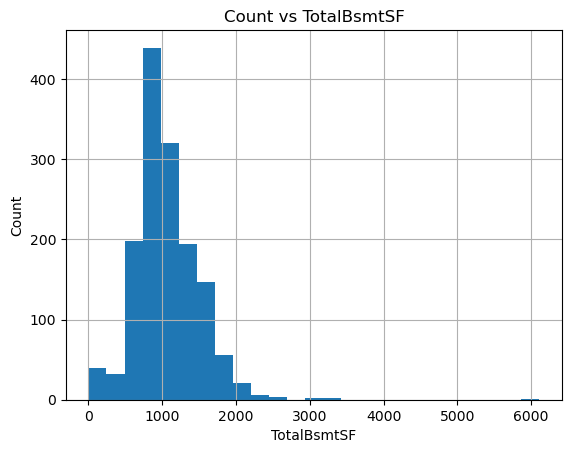

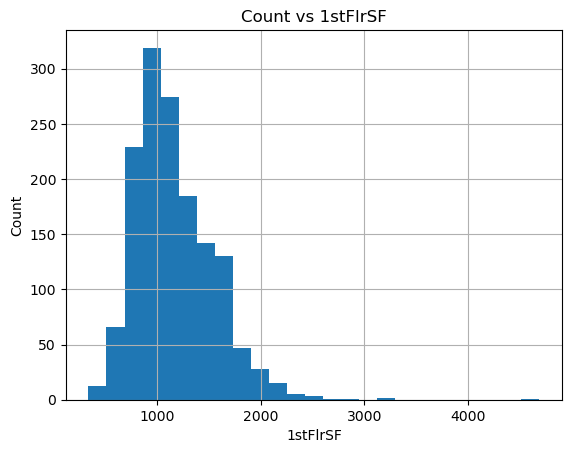

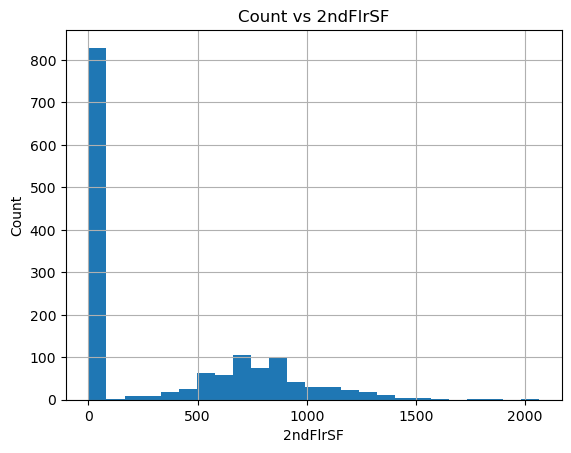

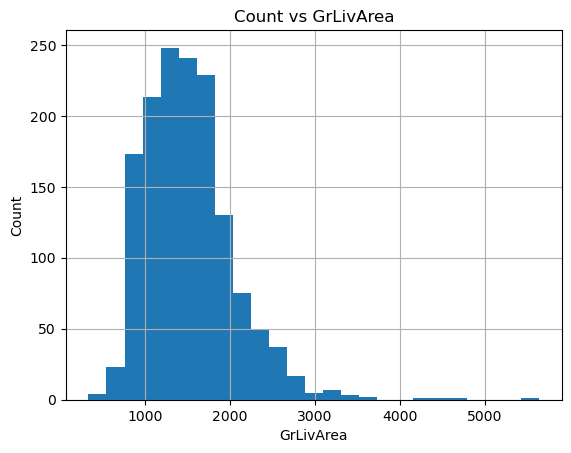

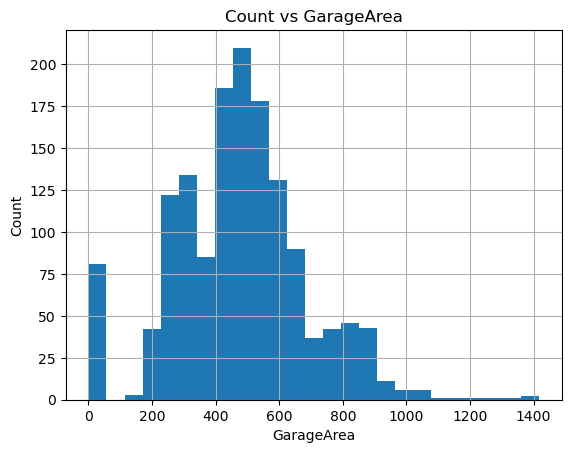

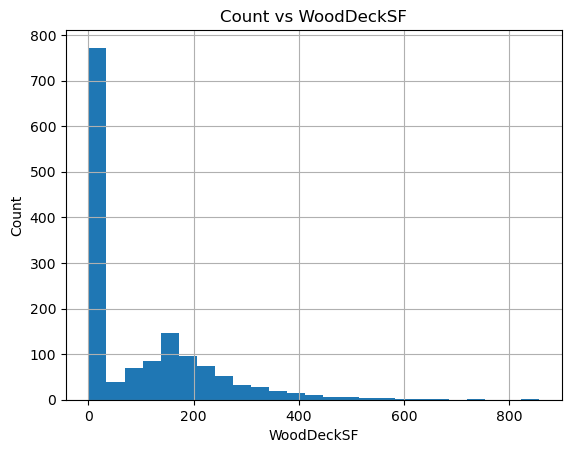

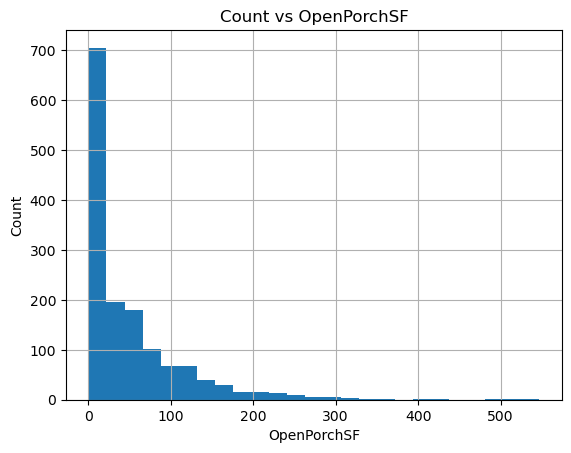

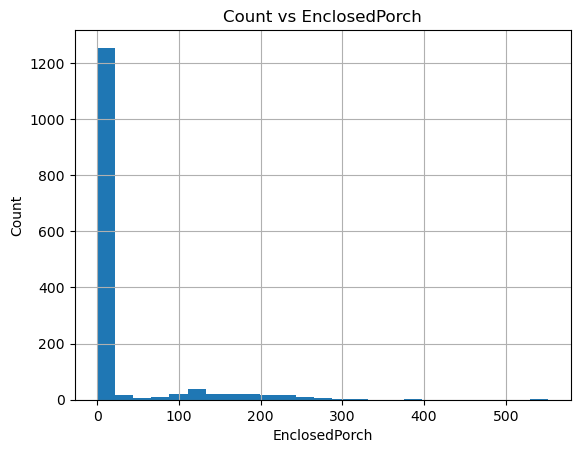

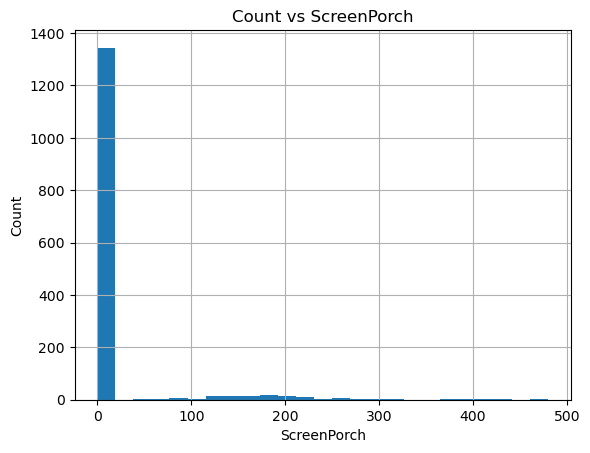

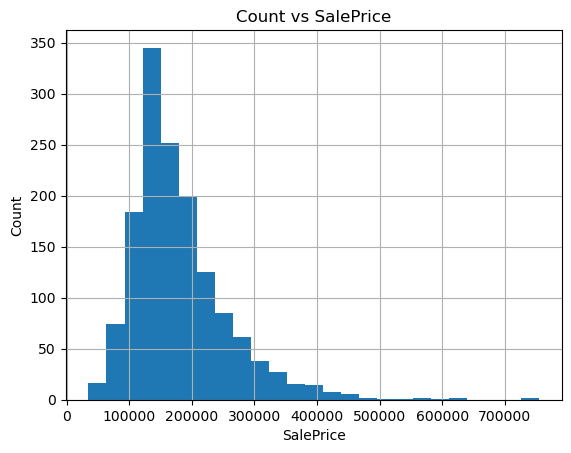

In [56]:
for col in continuous_col:
    dataset = data.copy()

    dataset[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.title('Count vs '+col)

    plt.show()

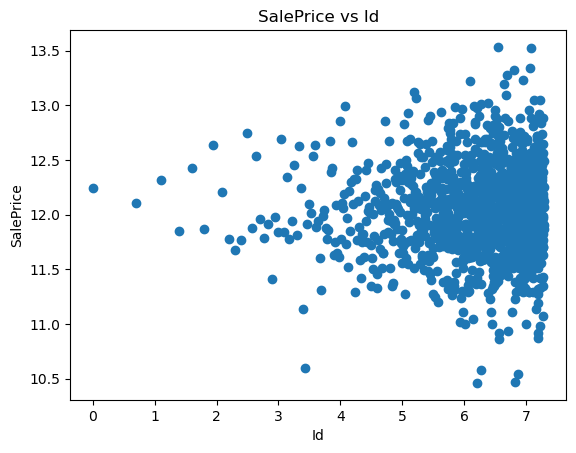

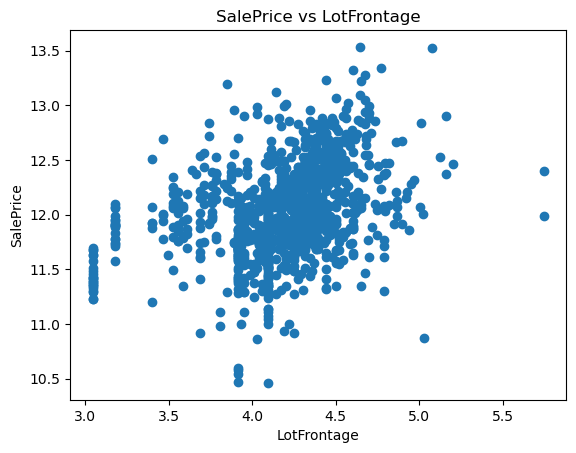

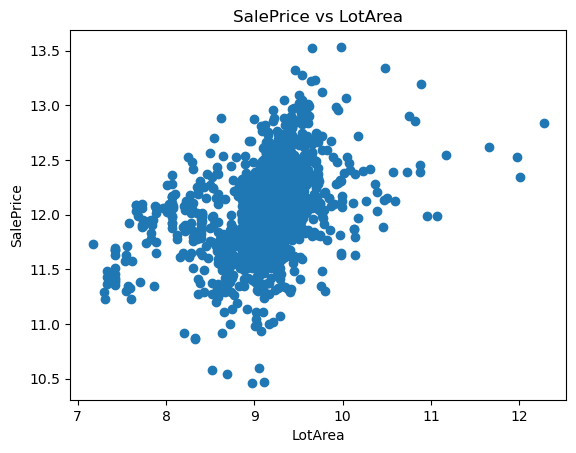

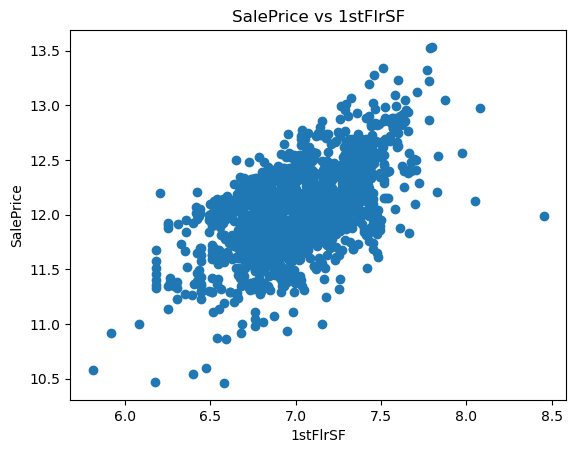

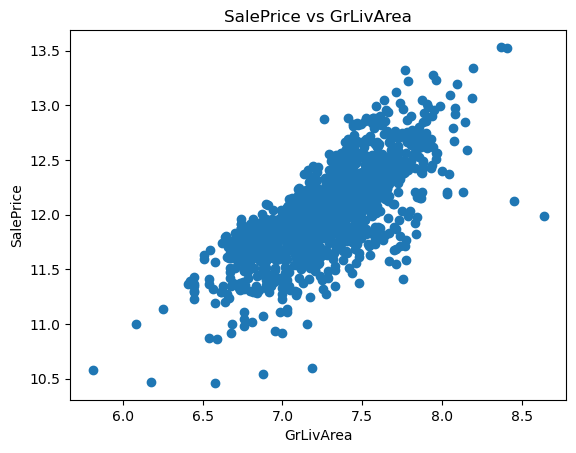

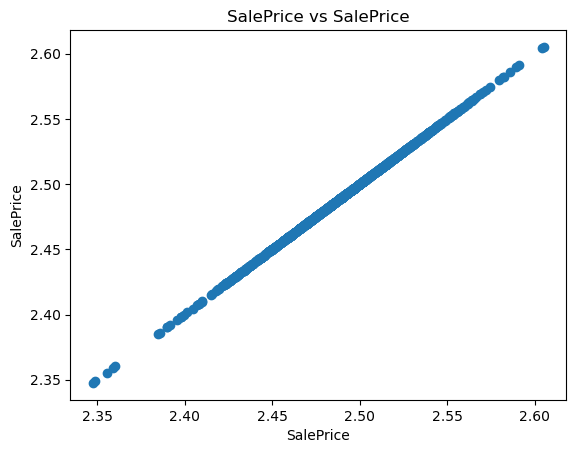

In [57]:
# converting all the continuous_data into logarthamatic 

for col in continuous_col:
    dataset = data.copy()
    if 0 in dataset[col].unique():
        pass
    else:
        dataset[col] = np.log(dataset[col])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        
        plt.scatter(dataset[col], dataset['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.title('SalePrice vs '+col)
        plt.show()
    

From the above image the more the years the less the sales price, incase of the remodification the more years more house has been gone for remodificaton we can see it from salesprice vs yearremodadd

In [58]:
descrete_col = [col for col in numerical_data.columns if len(data[col].unique()) < 25 and col not in yearList]

print(descrete_col)
print("length of the descrete columns: ", len(descrete_col))


['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
length of the descrete columns:  17


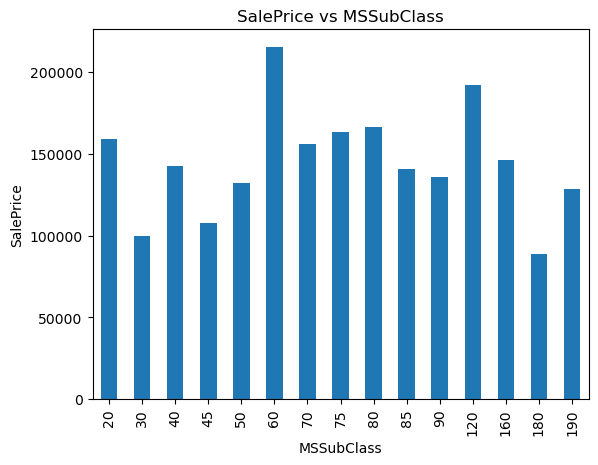

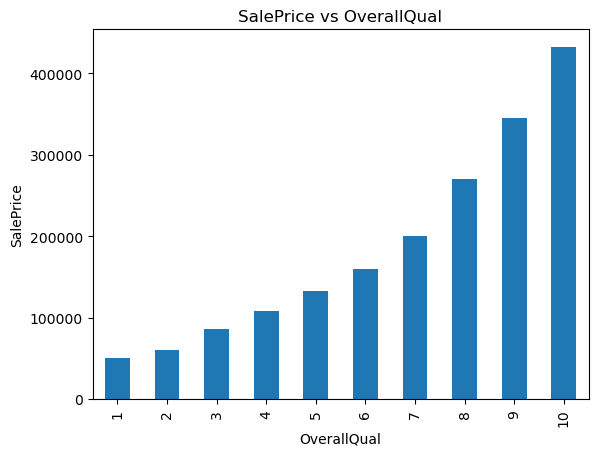

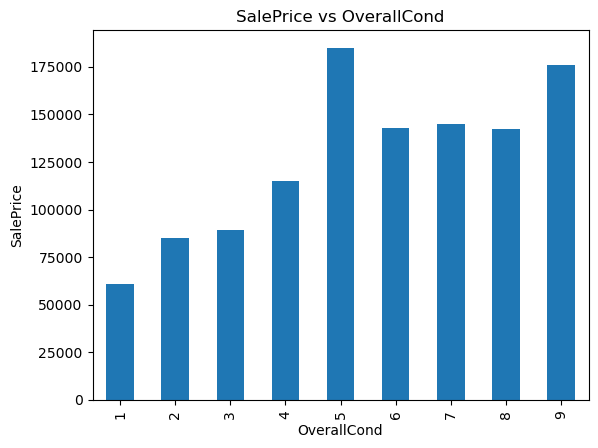

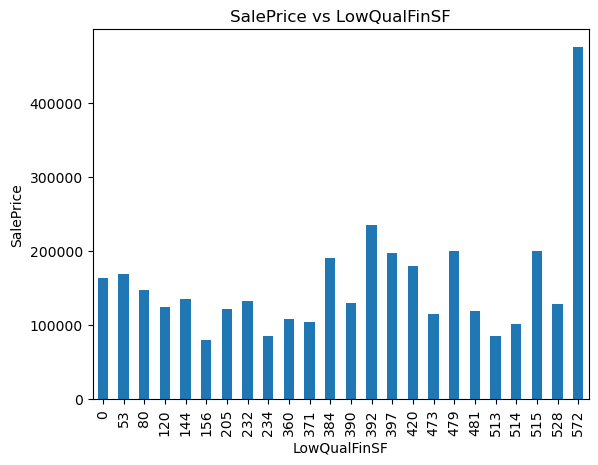

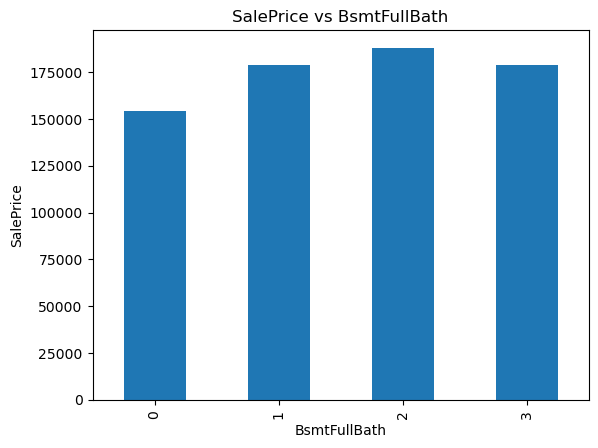

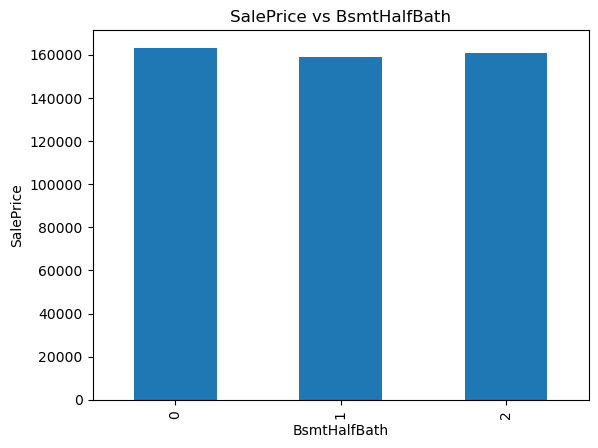

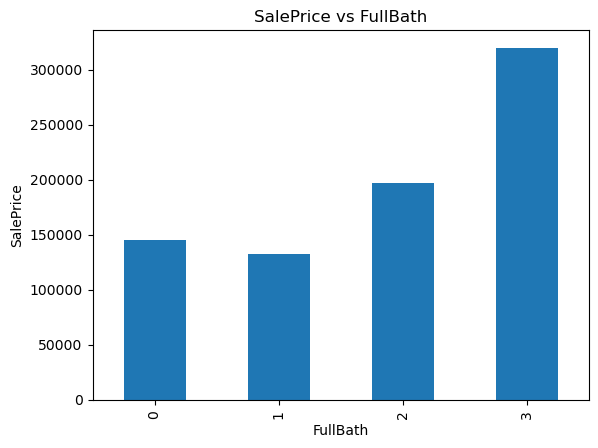

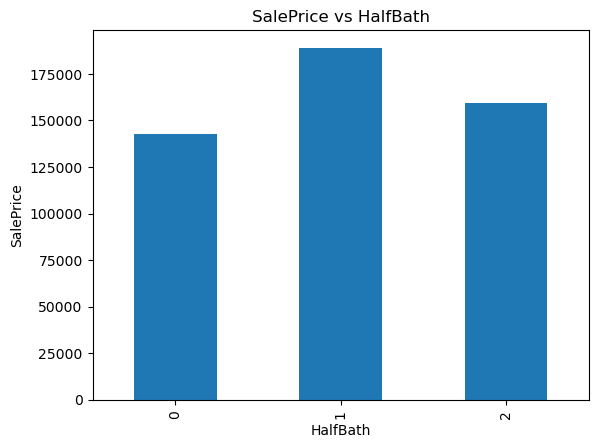

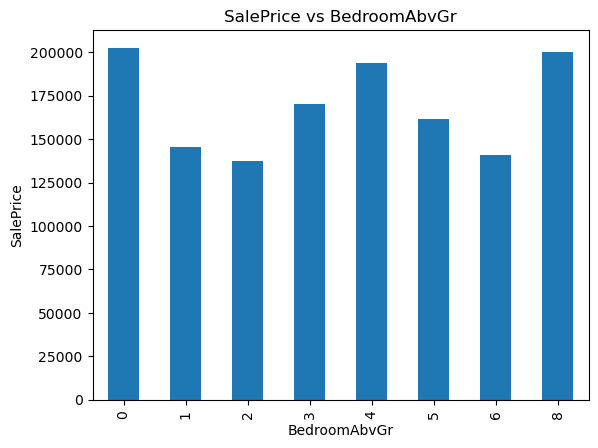

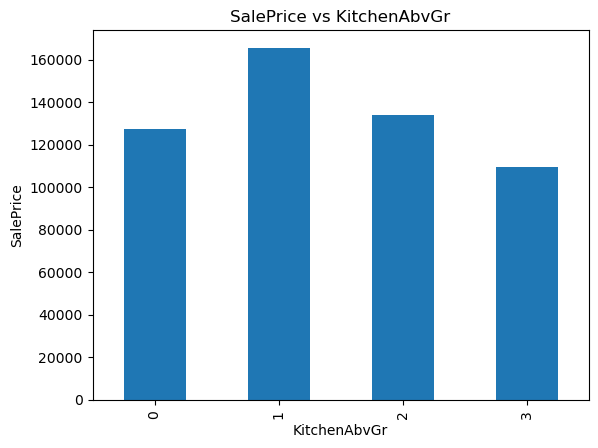

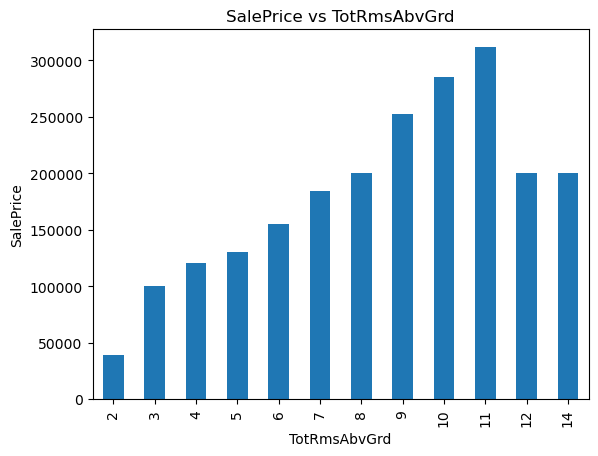

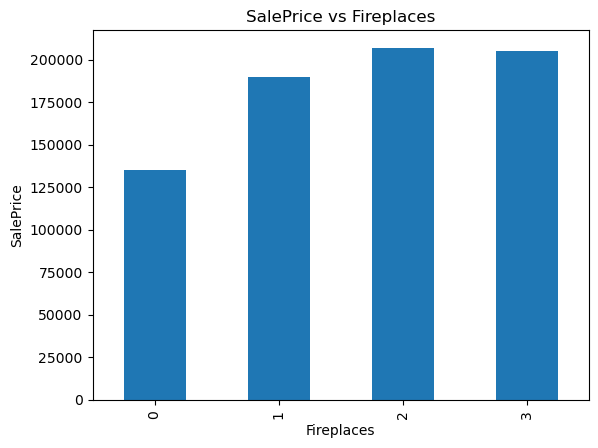

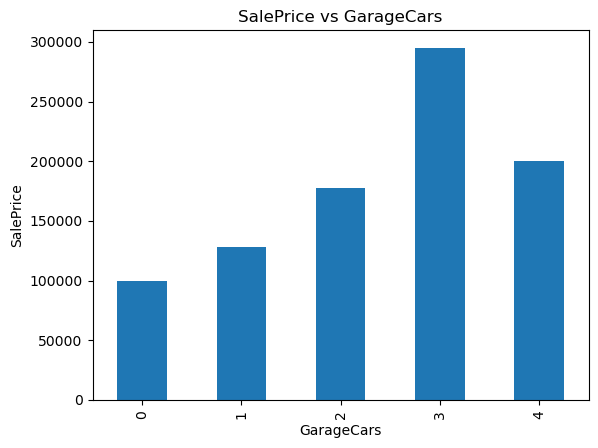

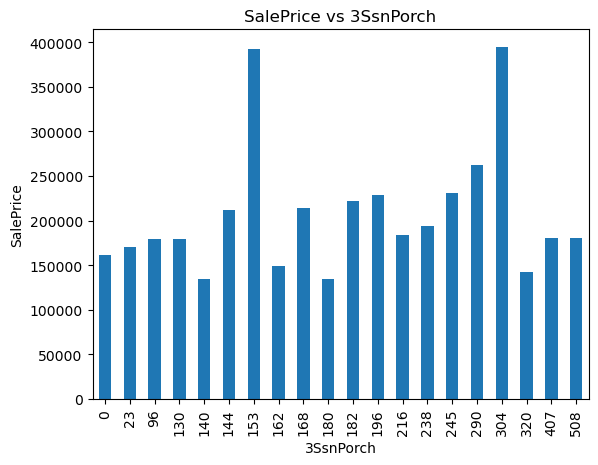

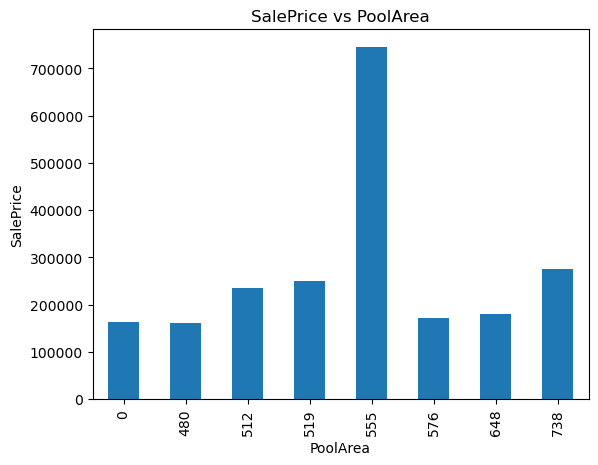

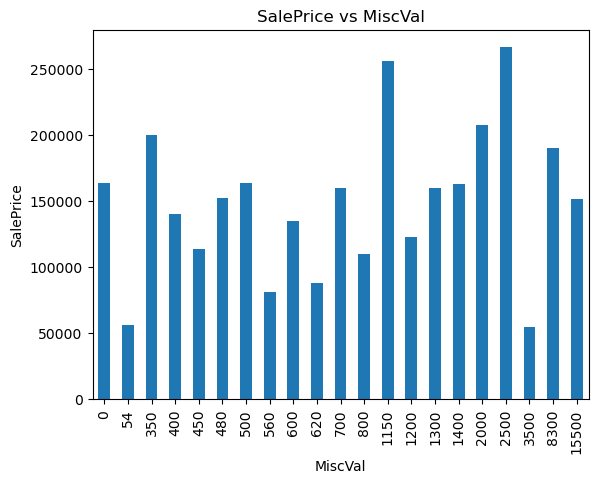

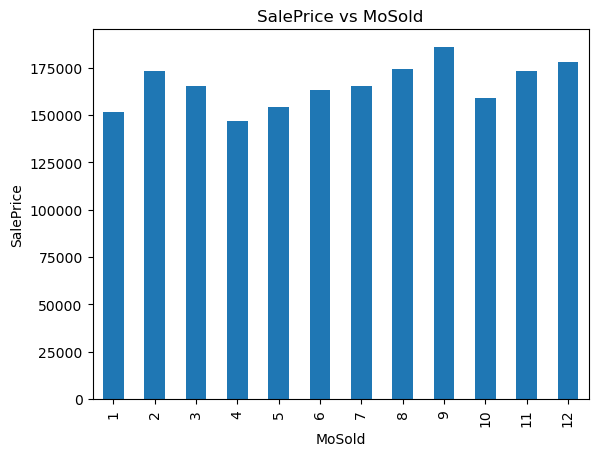

In [59]:
for col in descrete_col:
    dataset = data.copy()

    dataset.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')

    plt.title('SalePrice vs '+col)

    plt.show()


### Continuous Variable

In [60]:
continuous_col = [col for col in numerical_data.columns if col not in descrete_col and col not in yearList]

print(continuous_col)
print("length of the continuous columns: ", len(continuous_col))

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
length of the continuous columns:  17


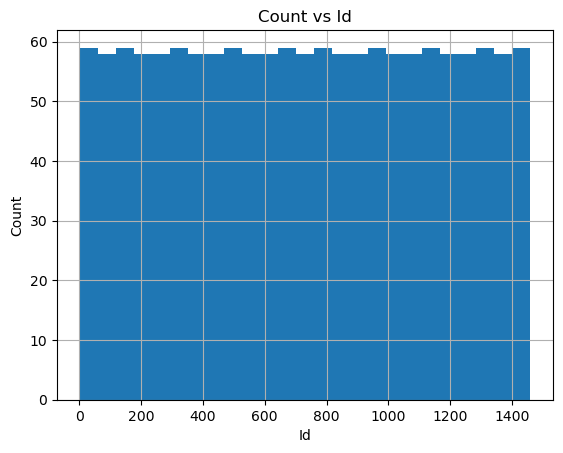

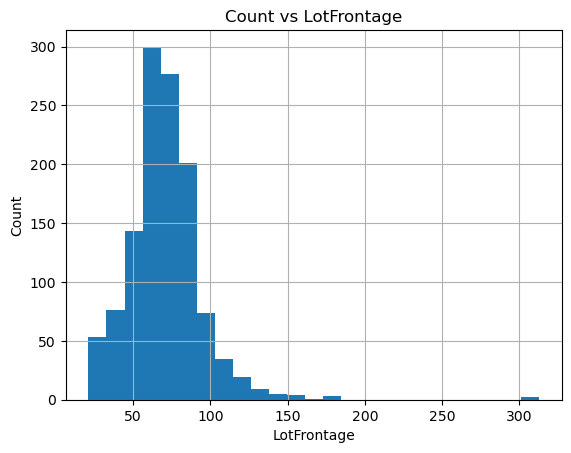

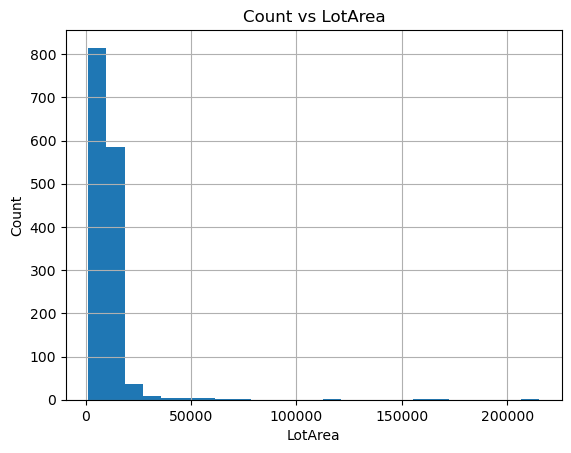

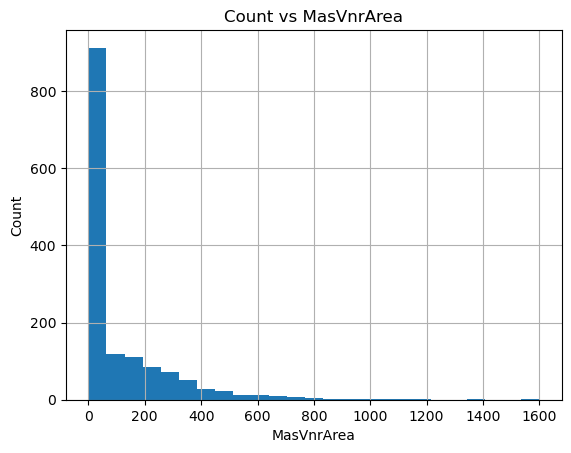

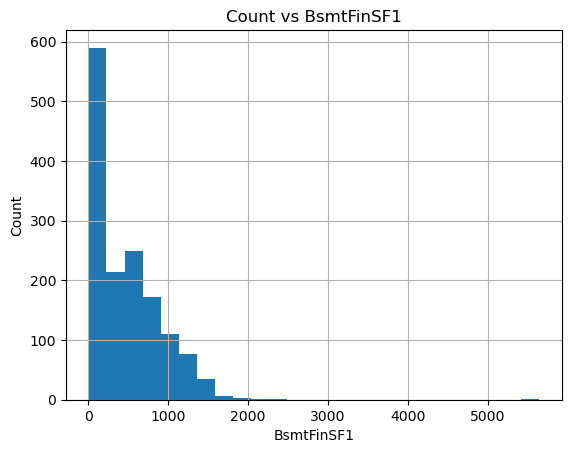

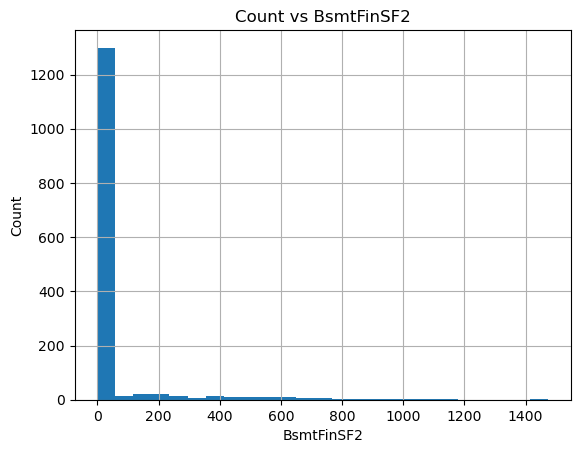

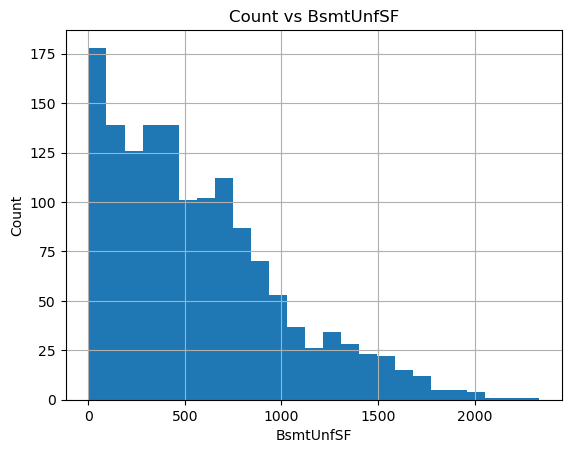

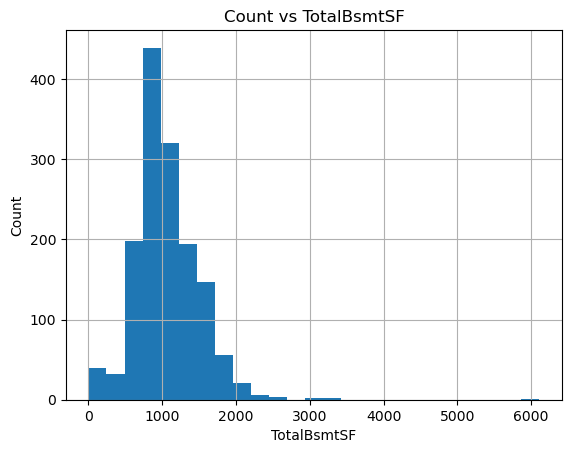

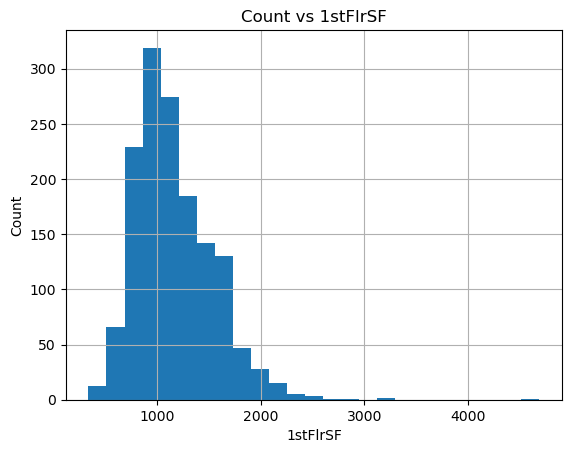

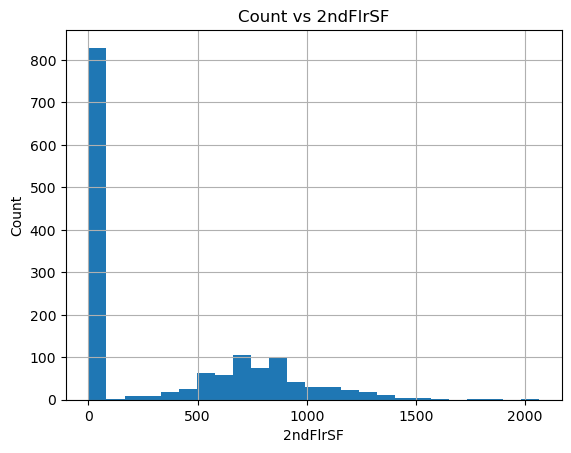

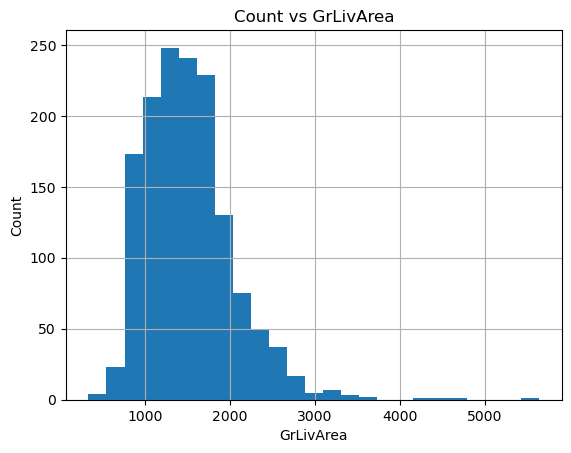

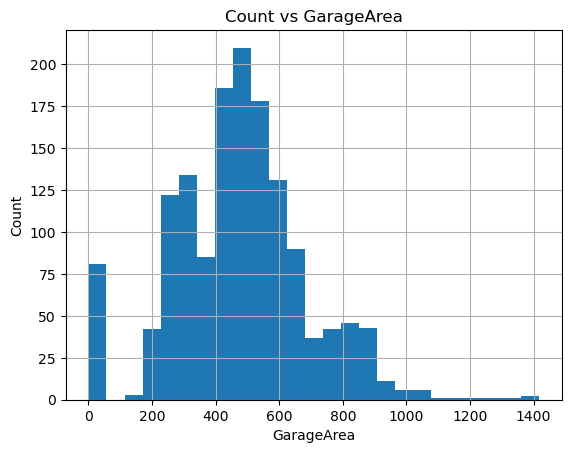

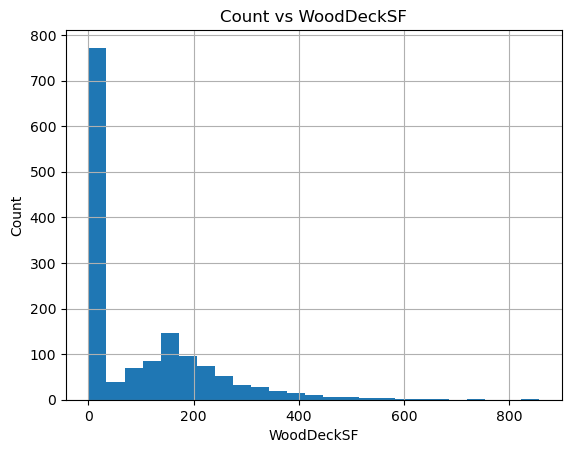

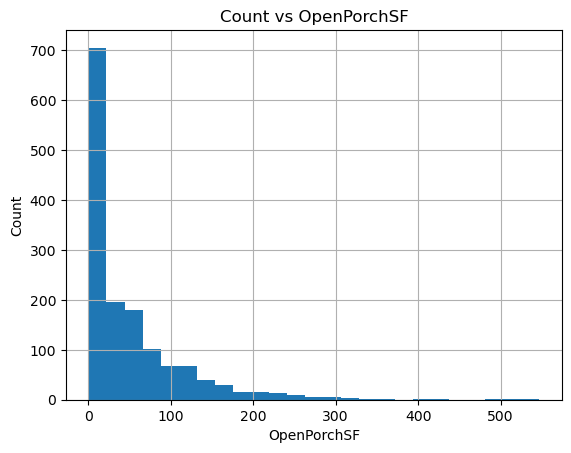

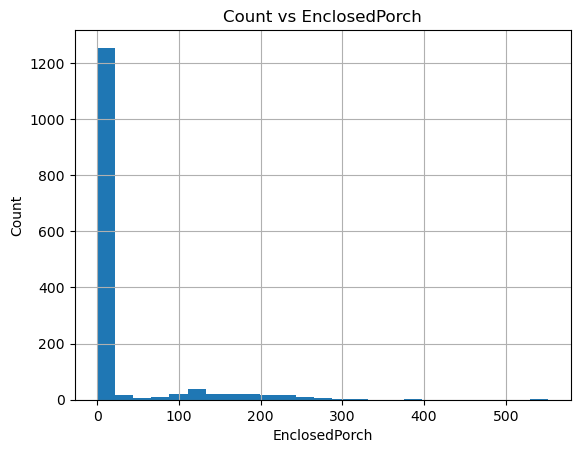

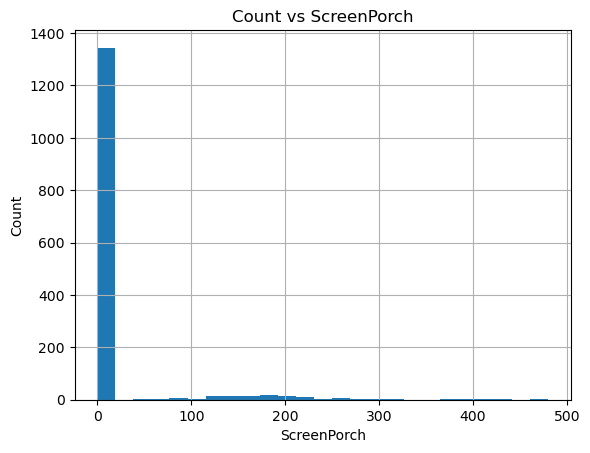

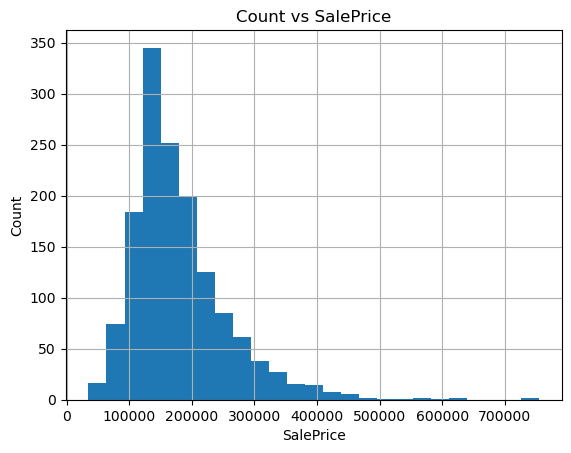

In [61]:
for col in continuous_col:
    dataset = data.copy()

    dataset[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.title('Count vs '+col)

    plt.show()

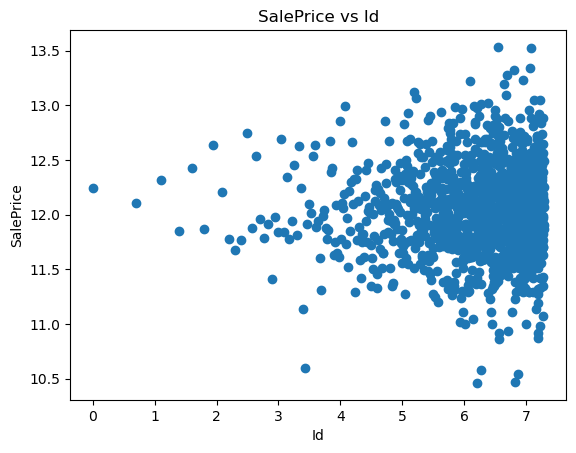

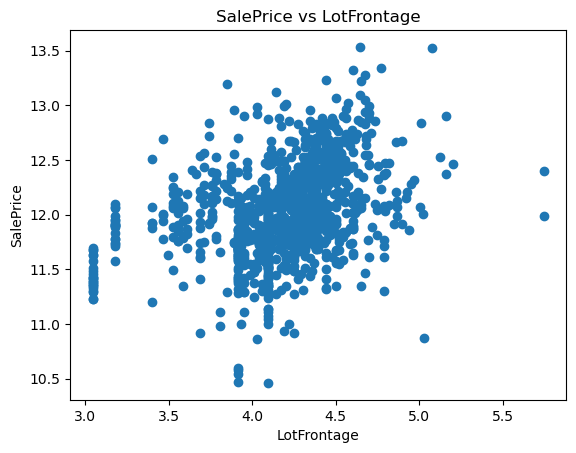

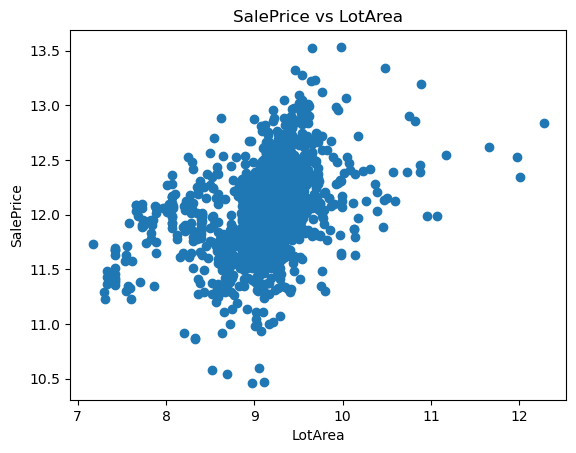

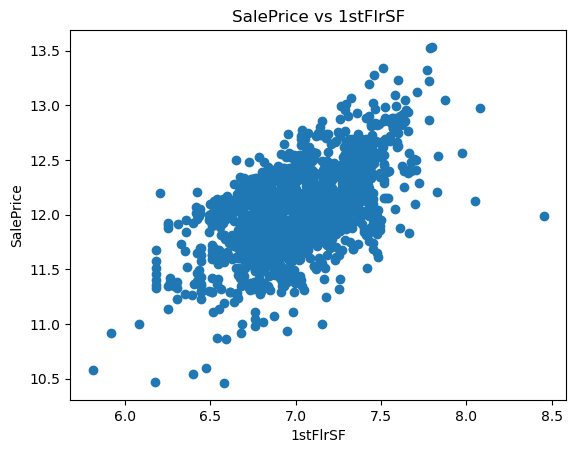

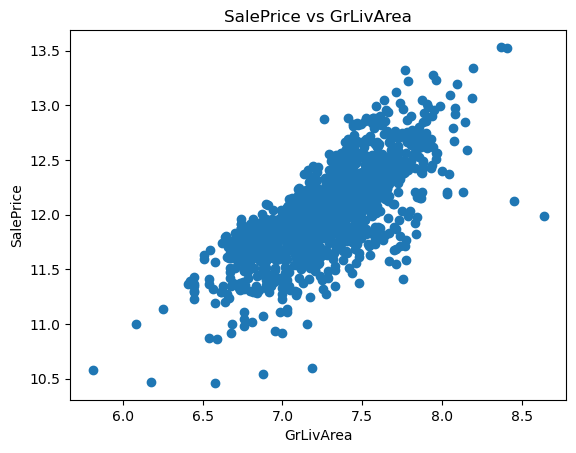

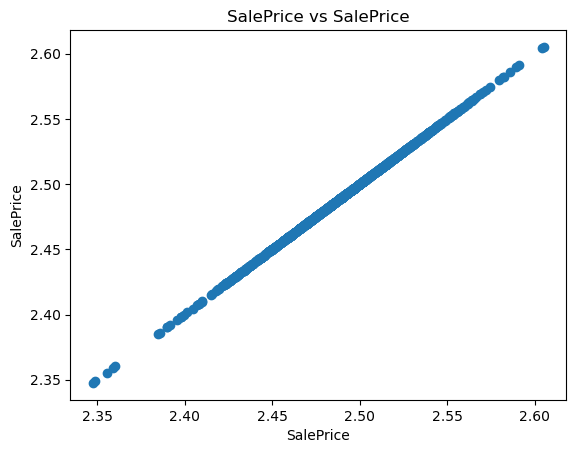

In [62]:
# converting all the continuous_data into logarthamatic 

for col in continuous_col:
    dataset = data.copy()
    if 0 in dataset[col].unique():
        pass
    else:
        dataset[col] = np.log(dataset[col])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        
        plt.scatter(dataset[col], dataset['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.title('SalePrice vs '+col)
        plt.show()
    

### Outliers

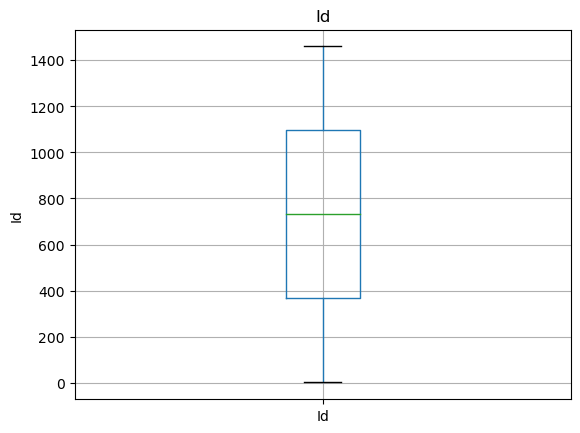

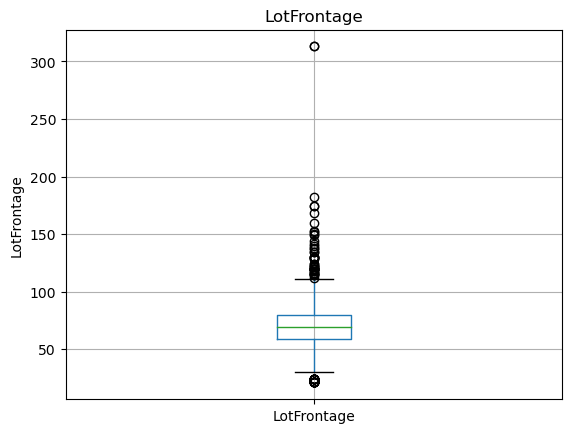

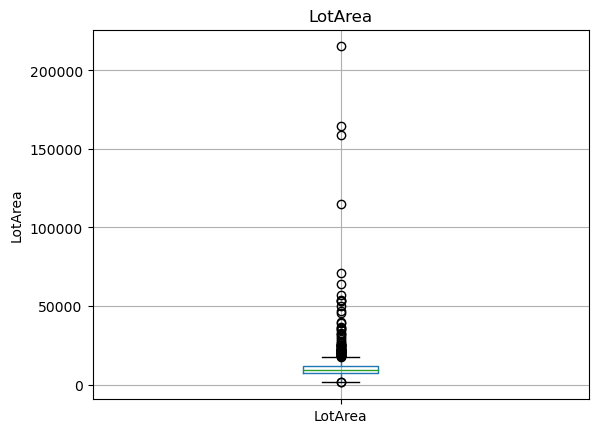

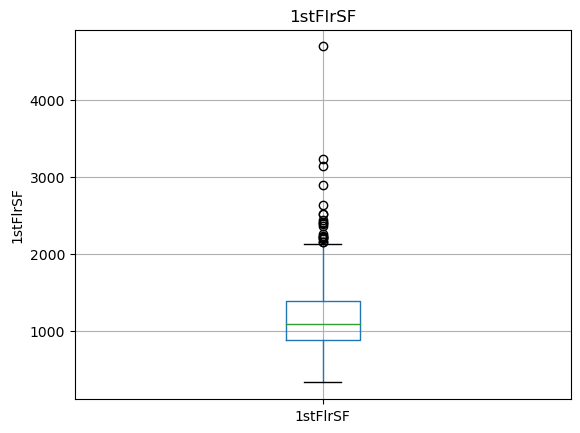

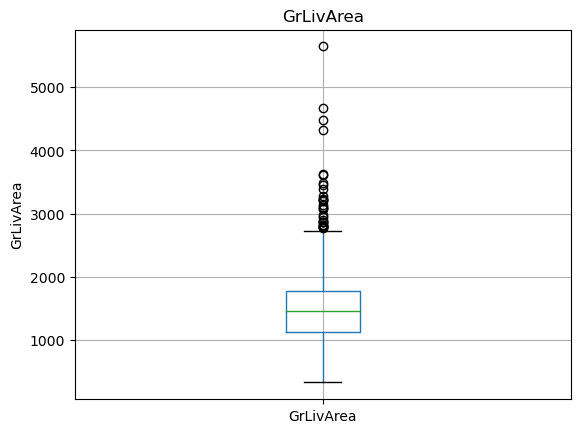

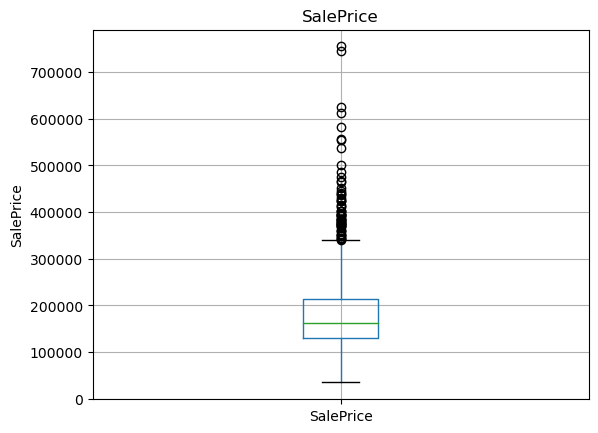

In [63]:
for col in continuous_col:
    dataset = data.copy()
    if 0 in dataset[col].unique():
        pass
    else:
        dataset[col] = np.log(dataset[col])
        data.boxplot(column=col)
        plt.ylabel(col)
        plt.title(col)
        plt.show()

### Categorical Data

In [64]:
# categorical data
cat_data = [col for col in data.columns if data[col].dtypes == 'O']

print(cat_data)
len(cat_data)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


43

In [65]:
for col in cat_data:
    print("Number of features in ", col, " : ", len(data[col].unique()))

Number of features in  MSZoning  :  5
Number of features in  Street  :  2
Number of features in  Alley  :  3
Number of features in  LotShape  :  4
Number of features in  LandContour  :  4
Number of features in  Utilities  :  2
Number of features in  LotConfig  :  5
Number of features in  LandSlope  :  3
Number of features in  Neighborhood  :  25
Number of features in  Condition1  :  9
Number of features in  Condition2  :  8
Number of features in  BldgType  :  5
Number of features in  HouseStyle  :  8
Number of features in  RoofStyle  :  6
Number of features in  RoofMatl  :  8
Number of features in  Exterior1st  :  15
Number of features in  Exterior2nd  :  16
Number of features in  MasVnrType  :  5
Number of features in  ExterQual  :  4
Number of features in  ExterCond  :  5
Number of features in  Foundation  :  6
Number of features in  BsmtQual  :  5
Number of features in  BsmtCond  :  5
Number of features in  BsmtExposure  :  5
Number of features in  BsmtFinType1  :  7
Number of featu

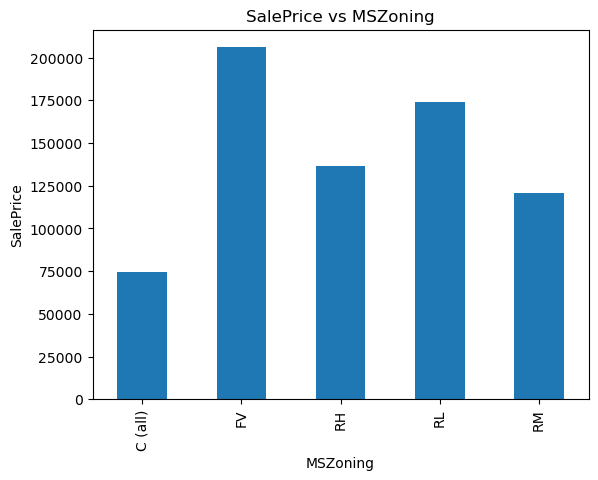

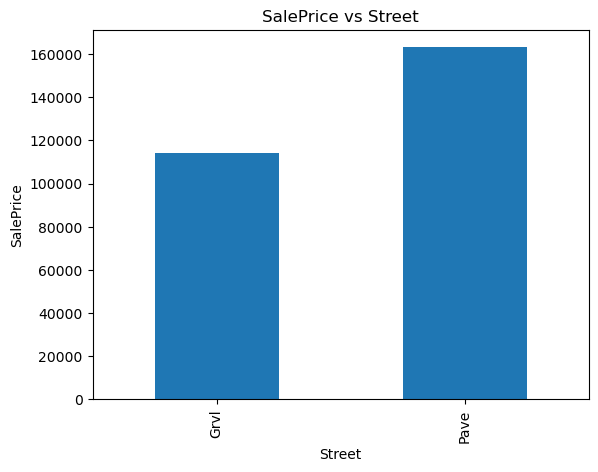

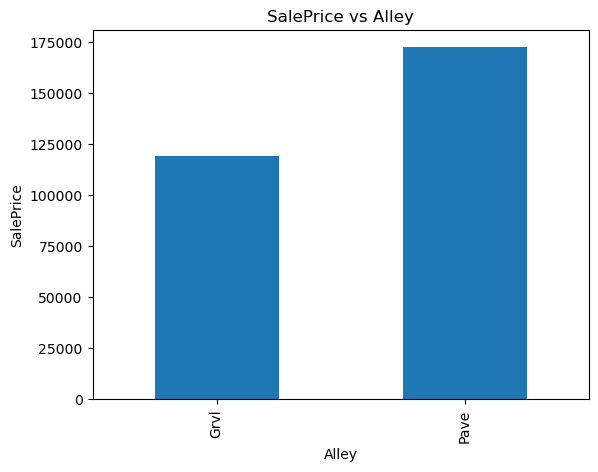

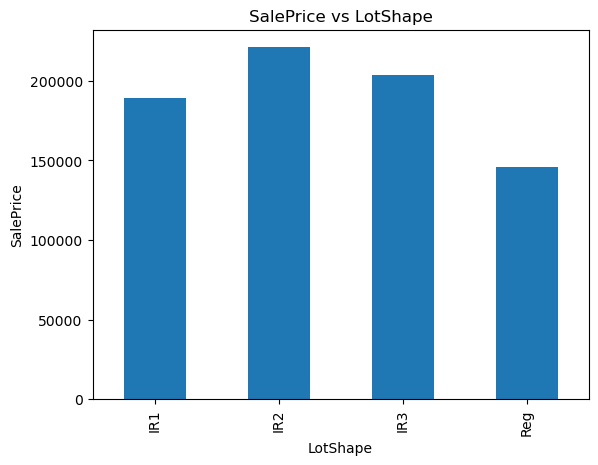

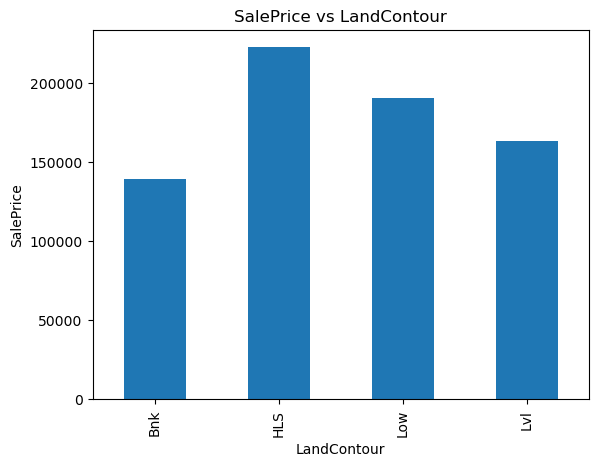

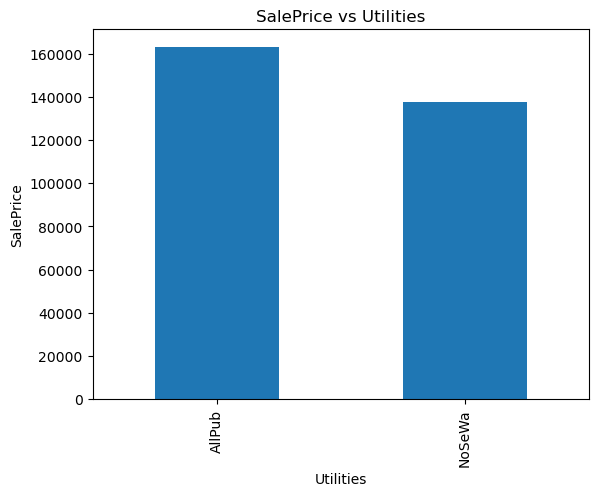

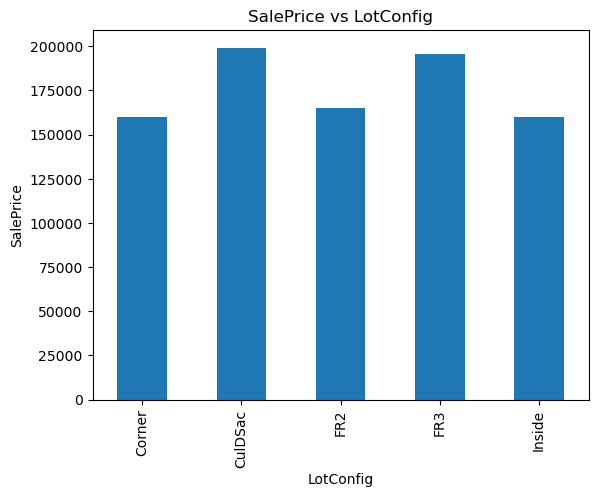

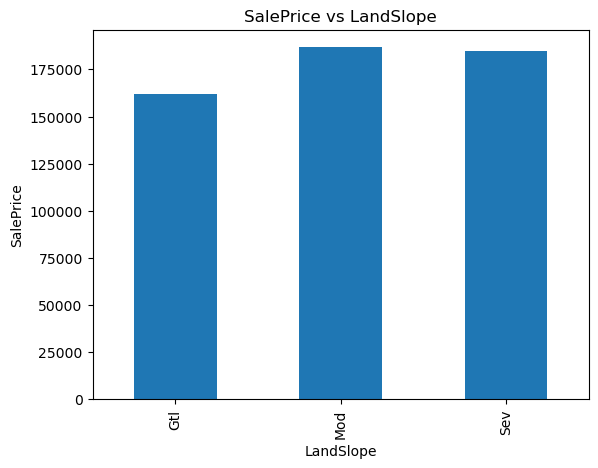

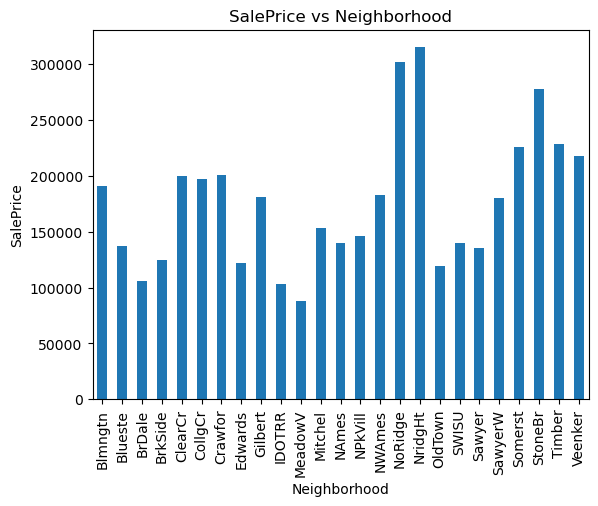

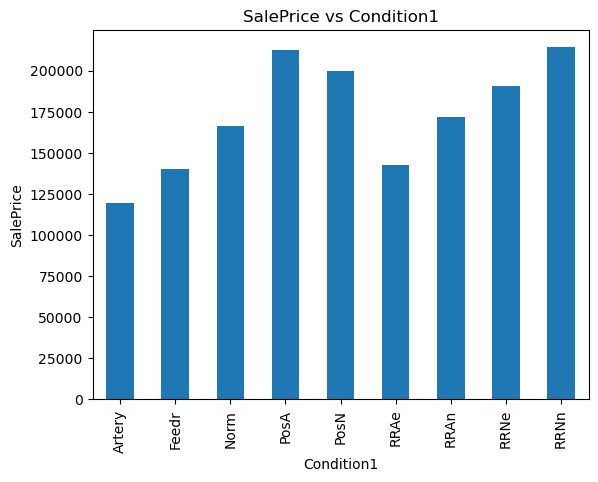

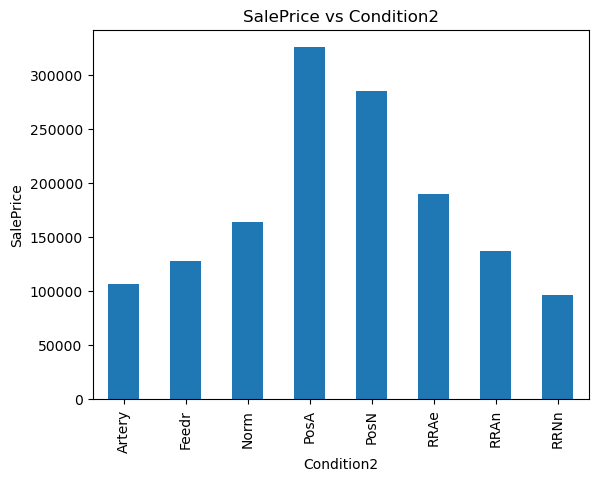

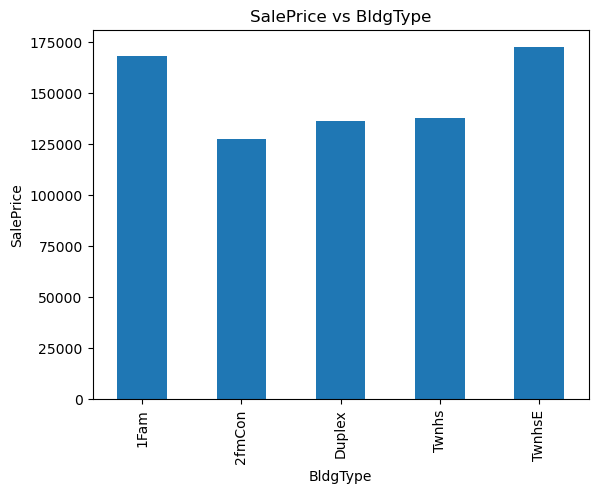

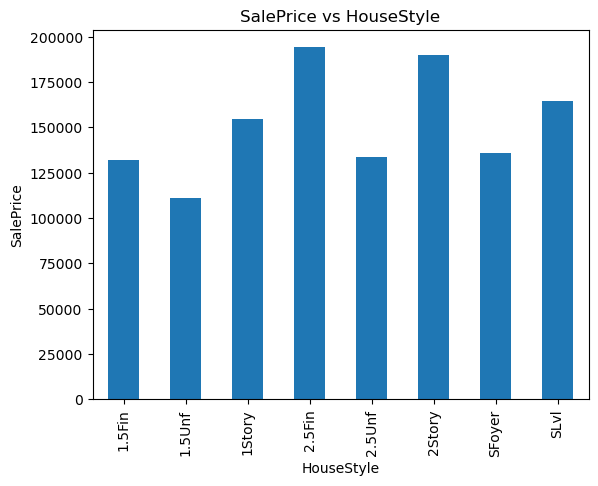

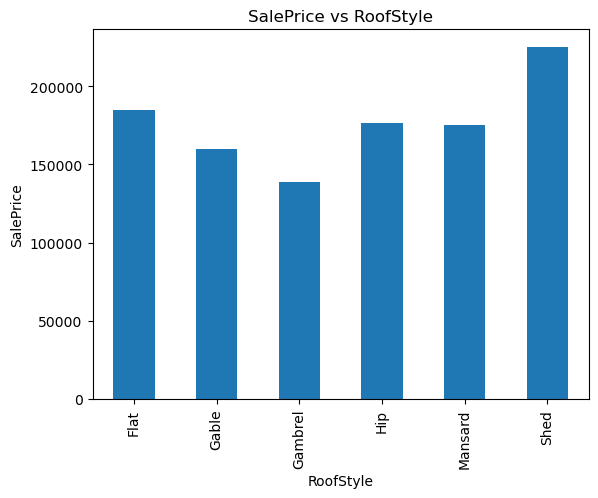

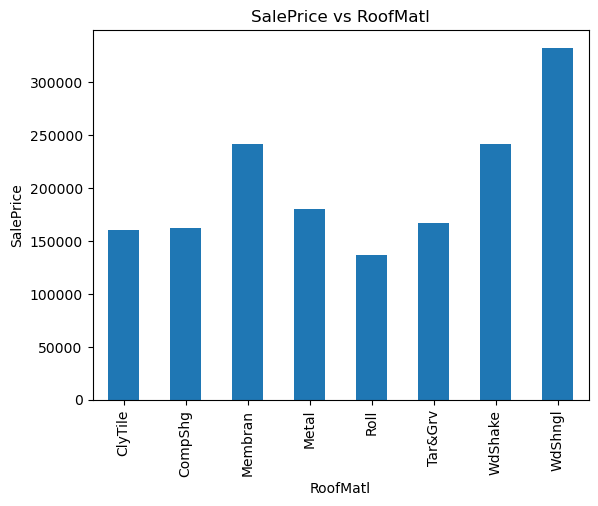

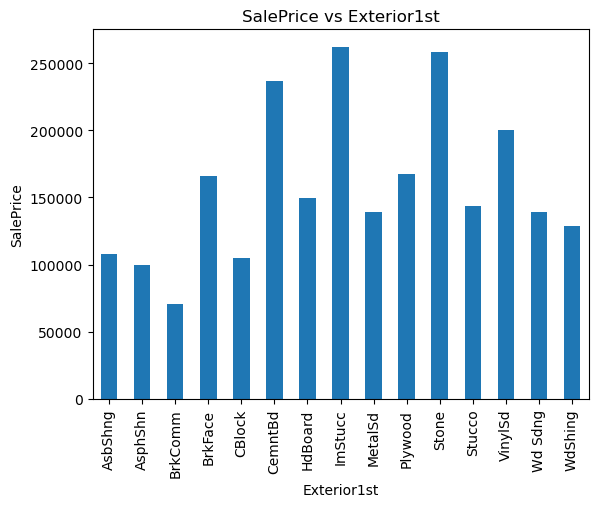

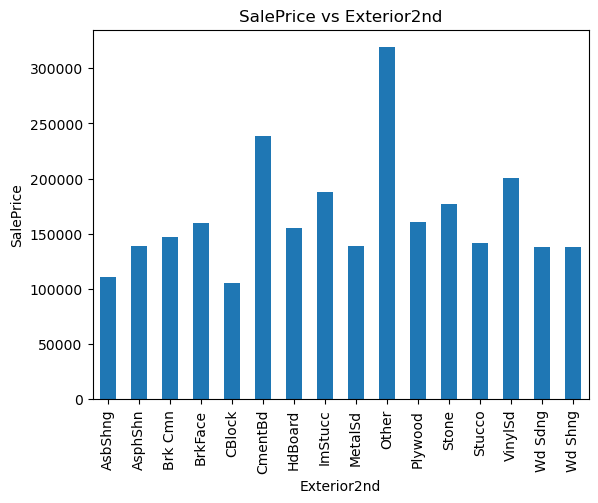

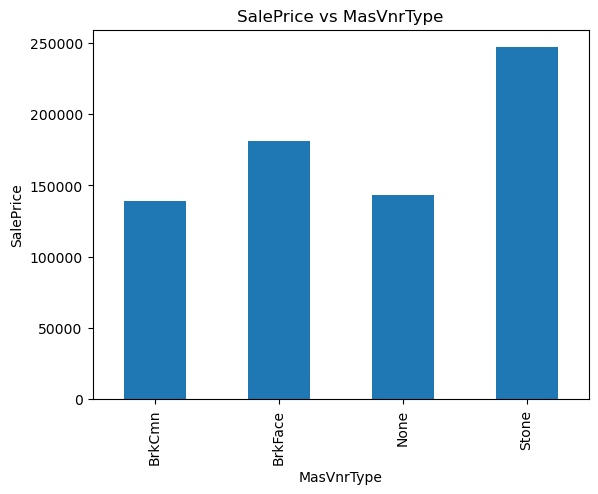

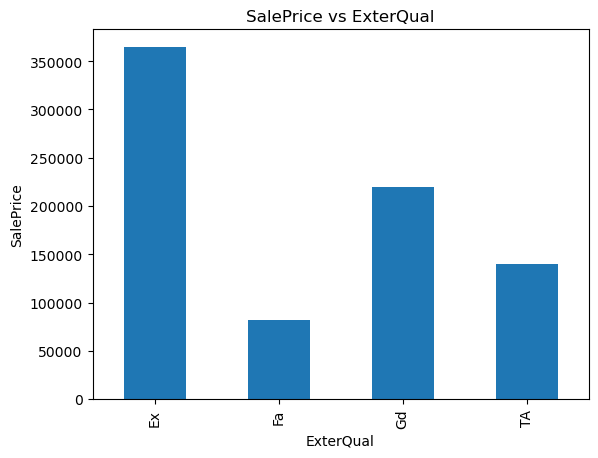

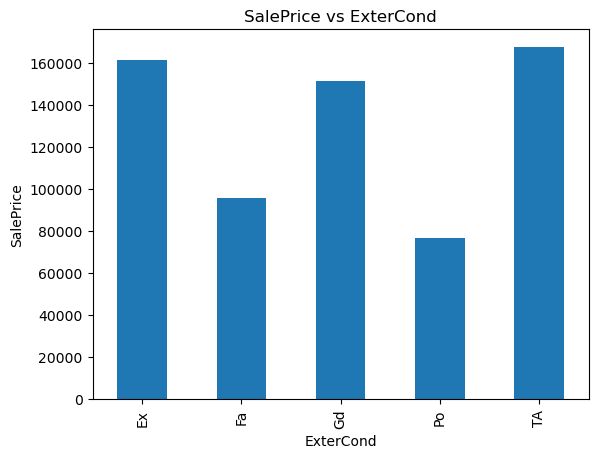

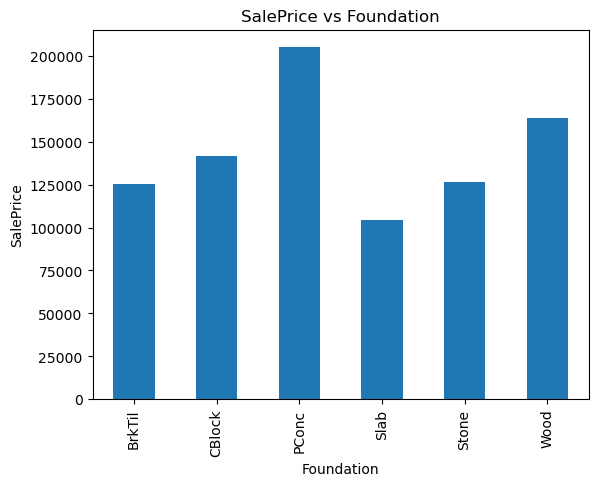

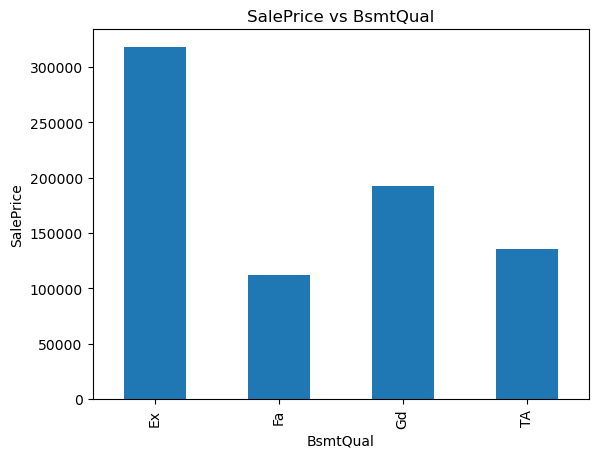

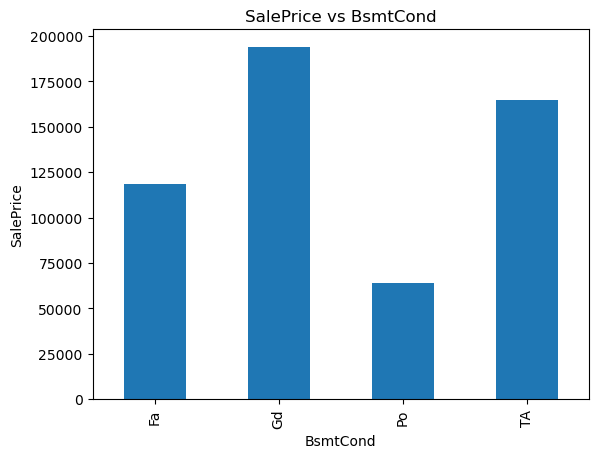

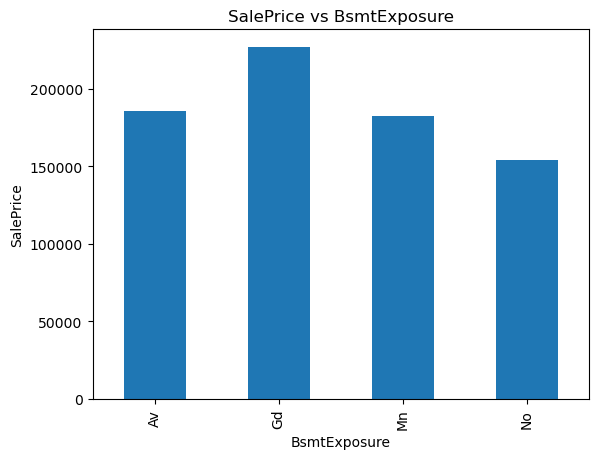

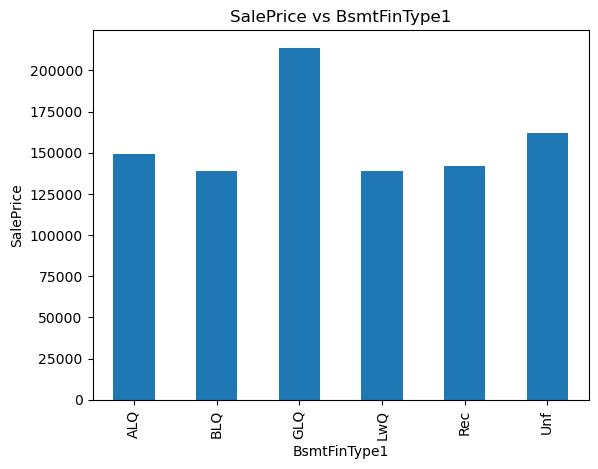

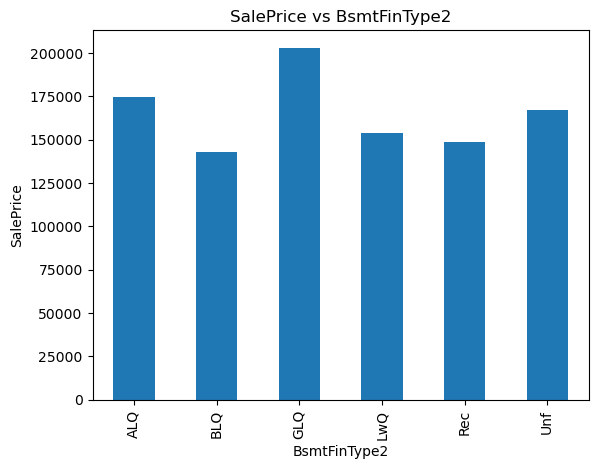

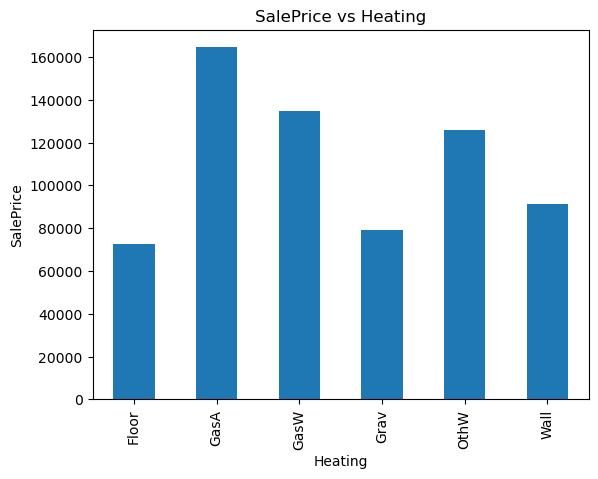

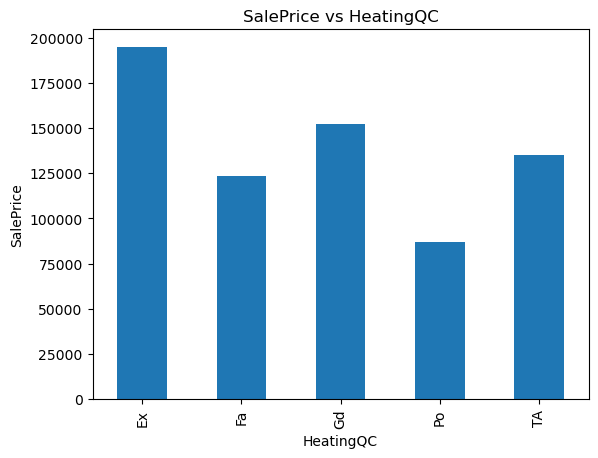

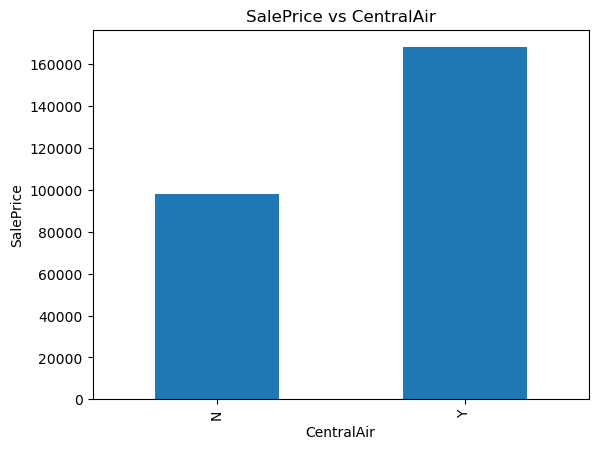

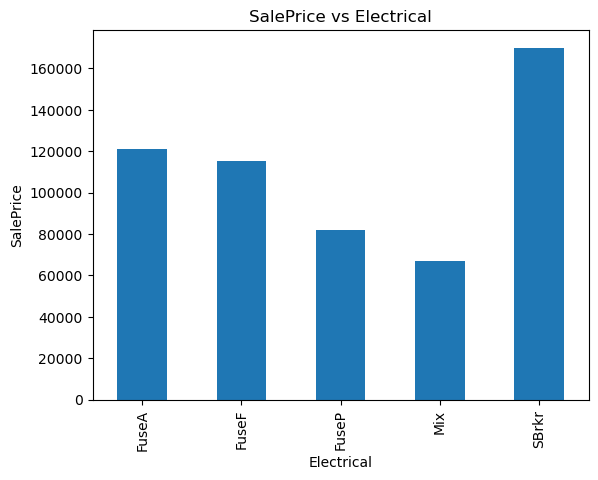

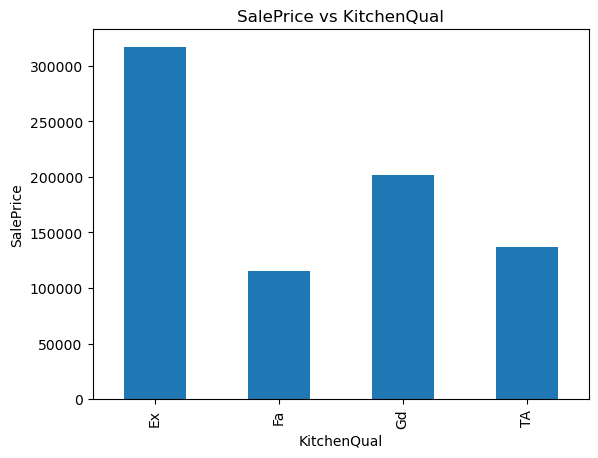

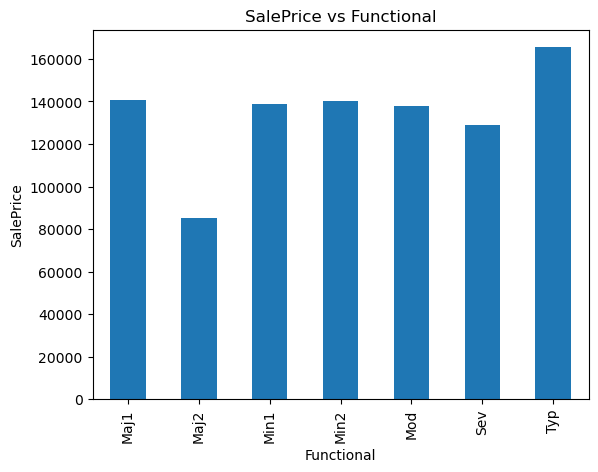

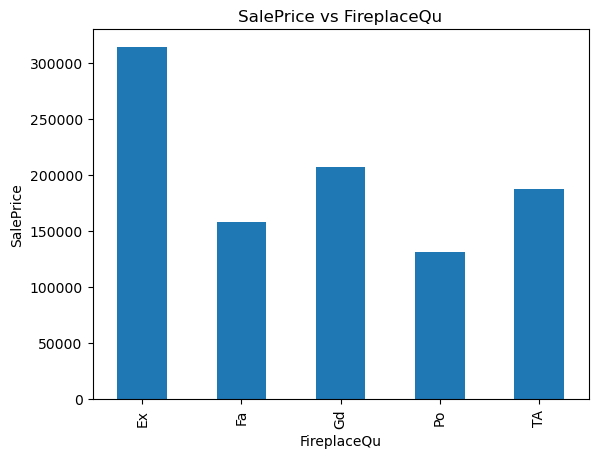

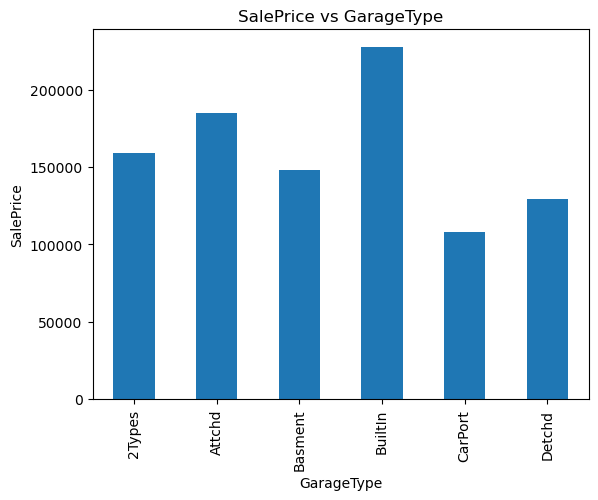

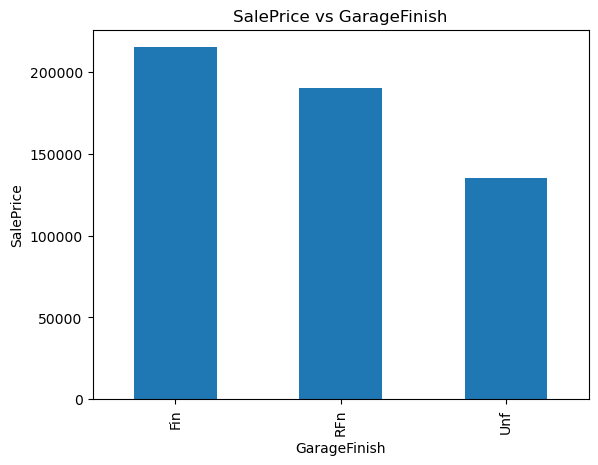

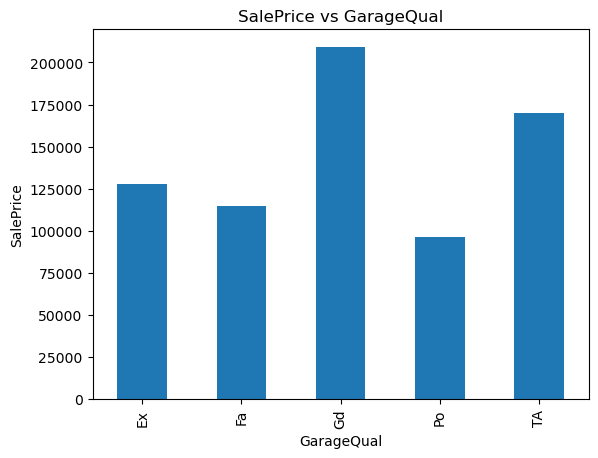

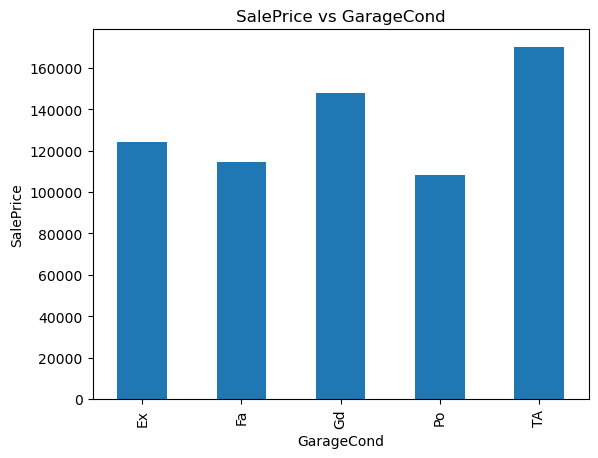

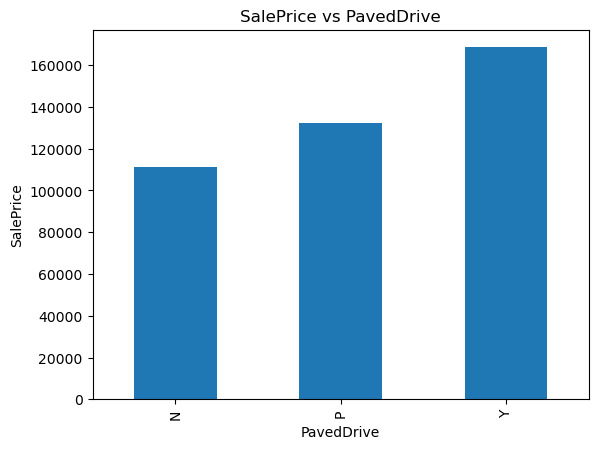

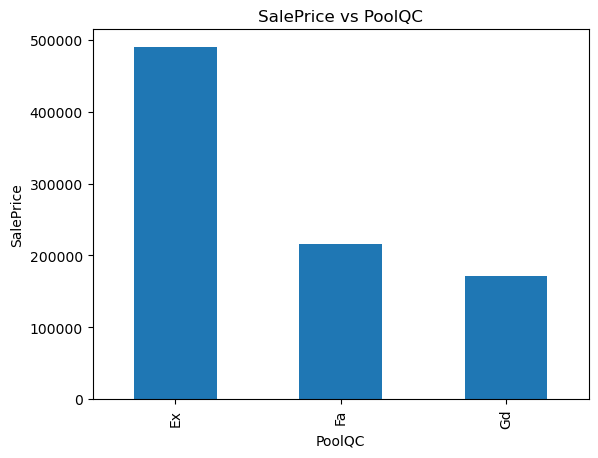

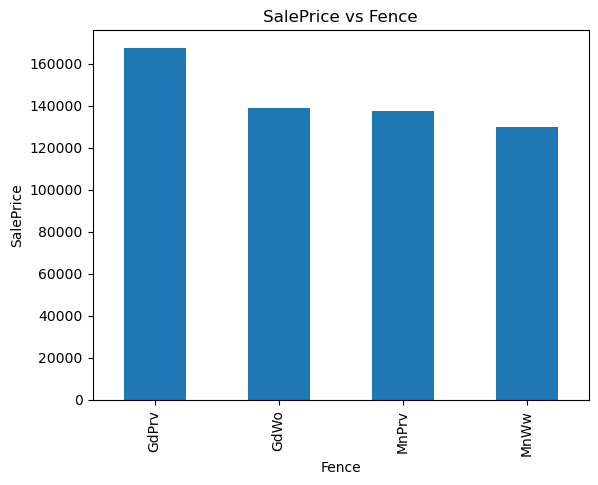

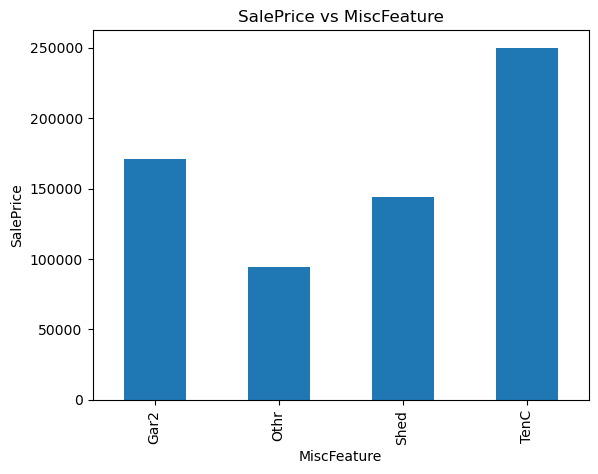

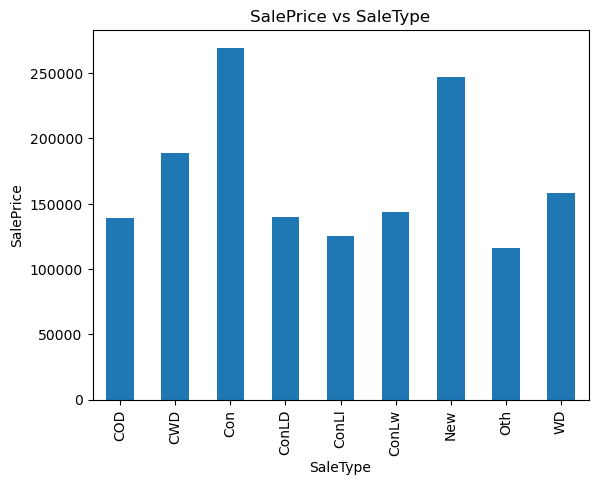

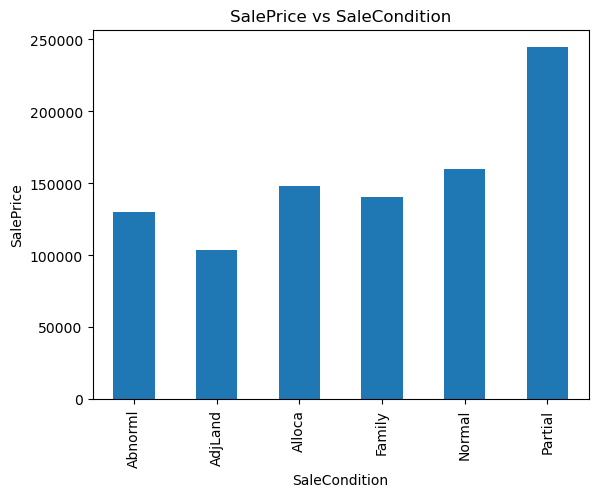

In [66]:
# Relationship between cat_data and SalesPrice

for col in cat_data:
    dataset = data.copy()
    
    dataset.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title('SalePrice vs '+col)
    
    plt.show()

In [30]:
# Chi-Square Test between cat_data and SalesPrice

from scipy.stats import chi2_contingency

for col in cat_data:
    dataset = data.copy()
    
    dataset[col] = dataset[col].fillna('Missing')
    
    dataset['SalePrice_binned'] = pd.qcut(dataset['SalePrice'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

    crosstab = pd.crosstab(dataset[col], dataset['SalePrice_binned'])
    
    chi2, p, dof, expected = chi2_contingency(crosstab)
    
    print("P-value for ", col, " : ", p)
    print("Chi2 value for ", col, " : ", chi2)
    print("Degree of Freedom for ", col, " : ", dof)
    print("Expected value for ", col, " : ", expected)

    if p < 0.05:
        print(col, " is dependent on SalePrice")
    else:
        print(col, " is independent on SalePrice")



P-value for  MSZoning  :  6.002756817064552e-59
Chi2 value for  MSZoning  :  309.0133438578515
Degree of Freedom for  MSZoning  :  12
Expected value for  MSZoning  :  [[  2.5          2.51369863   2.50684932   2.47945205]
 [ 16.25        16.3390411   16.29452055  16.11643836]
 [  4.           4.02191781   4.0109589    3.96712329]
 [287.75       289.32671233 288.53835616 285.38493151]
 [ 54.5         54.79863014  54.64931507  54.05205479]]
MSZoning  is dependent on SalePrice
P-value for  Street  :  0.110232901932006
Chi2 value for  Street  :  6.028477935110299
Degree of Freedom for  Street  :  3
Expected value for  Street  :  [[  1.5          1.50821918   1.50410959   1.48767123]
 [363.5        365.49178082 364.49589041 360.51232877]]
Street  is independent on SalePrice
P-value for  Alley  :  5.192754856410056e-12
Chi2 value for  Alley  :  64.60558676182183
Degree of Freedom for  Alley  :  6
Expected value for  Alley  :  [[ 12.5         12.56849315  12.53424658  12.39726027]
 [342.25   

P-value for  CentralAir  :  1.0172348655900653e-32
Chi2 value for  CentralAir  :  151.91605284591515
Degree of Freedom for  CentralAir  :  3
Expected value for  CentralAir  :  [[ 23.75        23.88013699  23.81506849  23.55479452]
 [341.25       343.11986301 342.18493151 338.44520548]]
CentralAir  is dependent on SalePrice
P-value for  Electrical  :  1.3110599944053687e-20
Chi2 value for  Electrical  :  131.07212001925825
Degree of Freedom for  Electrical  :  15
Expected value for  Electrical  :  [[2.35000000e+01 2.36287671e+01 2.35643836e+01 2.33068493e+01]
 [6.75000000e+00 6.78698630e+00 6.76849315e+00 6.69452055e+00]
 [7.50000000e-01 7.54109589e-01 7.52054795e-01 7.43835616e-01]
 [2.50000000e-01 2.51369863e-01 2.50684932e-01 2.47945205e-01]
 [2.50000000e-01 2.51369863e-01 2.50684932e-01 2.47945205e-01]
 [3.33500000e+02 3.35327397e+02 3.34413699e+02 3.30758904e+02]]
Electrical  is dependent on SalePrice
P-value for  KitchenQual  :  1.2505267536246473e-149
Chi2 value for  KitchenQual 

In [32]:
# t-test between cat_data and SalesPrice

from scipy.stats import ttest_ind

for col in cat_data:

    dataset = data.copy()

    dataset[col] = dataset[col].fillna('Missing')

    unique_cat = dataset[col].unique()

    for i in range(len(unique_cat)):
        for j in range(i+1, len(unique_cat)):
            ttest = ttest_ind(dataset[dataset[col] == unique_cat[i]]['SalePrice'], dataset[dataset[col] == unique_cat[j]]['SalePrice'])
            if ttest[1] < 0.05:
                print(unique_cat[i], unique_cat[j], " are dependent on each other")
            else:
                print(unique_cat[i], unique_cat[j], " are independent on each other")



RL RM  are dependent on each other
RL C (all)  are dependent on each other
RL FV  are dependent on each other
RL RH  are dependent on each other
RM C (all)  are dependent on each other
RM FV  are dependent on each other
RM RH  are independent on each other
C (all) FV  are dependent on each other
C (all) RH  are dependent on each other
FV RH  are dependent on each other
Pave Grvl  are independent on each other
Missing Grvl  are dependent on each other
Missing Pave  are independent on each other
Grvl Pave  are dependent on each other
Reg IR1  are dependent on each other
Reg IR2  are dependent on each other
Reg IR3  are dependent on each other
IR1 IR2  are dependent on each other
IR1 IR3  are independent on each other
IR2 IR3  are independent on each other
Lvl Bnk  are dependent on each other
Lvl Low  are independent on each other
Lvl HLS  are dependent on each other
Bnk Low  are dependent on each other
Bnk HLS  are dependent on each other
Low HLS  are independent on each other
AllPub NoS

/var/folders/5j/f6qclvf555d323h75x4l2v0w0000gn/T/ipykernel_29067/1814061830.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = ttest_ind(dataset[dataset[col] == unique_cat[i]]['SalePrice'], dataset[dataset[col] == unique_cat[j]]['SalePrice'])


NAmes IDOTRR  are dependent on each other
NAmes MeadowV  are dependent on each other
NAmes Edwards  are dependent on each other
NAmes Timber  are dependent on each other
NAmes Gilbert  are dependent on each other
NAmes StoneBr  are dependent on each other
NAmes ClearCr  are dependent on each other
NAmes NPkVill  are independent on each other
NAmes Blmngtn  are dependent on each other
NAmes BrDale  are dependent on each other
NAmes SWISU  are independent on each other
NAmes Blueste  are independent on each other
SawyerW IDOTRR  are dependent on each other
SawyerW MeadowV  are dependent on each other
SawyerW Edwards  are dependent on each other
SawyerW Timber  are dependent on each other
SawyerW Gilbert  are independent on each other
SawyerW StoneBr  are dependent on each other
SawyerW ClearCr  are dependent on each other
SawyerW NPkVill  are dependent on each other
SawyerW Blmngtn  are independent on each other
SawyerW BrDale  are dependent on each other
SawyerW SWISU  are dependent on 

MetalSd CBlock  are independent on each other
Wd Sdng HdBoard  are dependent on each other
Wd Sdng BrkFace  are dependent on each other
Wd Sdng WdShing  are independent on each other
Wd Sdng CemntBd  are dependent on each other
Wd Sdng Plywood  are dependent on each other
Wd Sdng AsbShng  are dependent on each other
Wd Sdng Stucco  are independent on each other
Wd Sdng BrkComm  are independent on each other
Wd Sdng AsphShn  are independent on each other
Wd Sdng Stone  are dependent on each other
Wd Sdng ImStucc  are independent on each other
Wd Sdng CBlock  are independent on each other
HdBoard BrkFace  are dependent on each other
HdBoard WdShing  are independent on each other
HdBoard CemntBd  are dependent on each other
HdBoard Plywood  are independent on each other
HdBoard AsbShng  are dependent on each other
HdBoard Stucco  are independent on each other
HdBoard BrkComm  are independent on each other
HdBoard AsphShn  are independent on each other
HdBoard Stone  are dependent on each 

No Gd  are dependent on each other
No Mn  are dependent on each other
No Av  are dependent on each other
No Missing  are dependent on each other
Gd Mn  are dependent on each other
Gd Av  are dependent on each other
Gd Missing  are dependent on each other
Mn Av  are independent on each other
Mn Missing  are dependent on each other
Av Missing  are dependent on each other
GLQ ALQ  are dependent on each other
GLQ Unf  are dependent on each other
GLQ Rec  are dependent on each other
GLQ BLQ  are dependent on each other
GLQ Missing  are dependent on each other
GLQ LwQ  are dependent on each other
ALQ Unf  are independent on each other
ALQ Rec  are dependent on each other
ALQ BLQ  are dependent on each other
ALQ Missing  are dependent on each other
ALQ LwQ  are independent on each other
Unf Rec  are dependent on each other
Unf BLQ  are dependent on each other
Unf Missing  are dependent on each other
Unf LwQ  are dependent on each other
Rec BLQ  are independent on each other
Rec Missing  are d

### Feature Engineering

In [67]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data['SalePrice'], test_size=0.1, random_state=0)

X_train.shape, X_test.shape

((1314, 81), (146, 81))

### Missing Values

In [68]:
# Lets capture all the Nan Values
# Firstly find out the categorical features which are having null values

col_nan = [col for col in dataset.columns if dataset[col].isna().sum() > 1]

for col in col_nan:
    print(col, np.round(data[col].isna().sum()/len(data[col]), 4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.0055
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


In [69]:
# Handling Missing values

def missing__values(data, col_nan):

    dataset = data.copy()

    dataset[col_nan] = dataset[col_nan].fillna('Missing')

    dataset.isna().sum()

    return dataset


dataset = missing__values(data, col_nan)
print(dataset.isna().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [70]:
# Let's check the numerical variables that contains missing values
numerical_col = [num for num in data.columns if data[num].isna().sum() > 1 and data[num].dtypes!='O']


# We will print the numerical nan variables and percentage of missing values
for col in numerical_col:
    print(col + "Null percentage: " + str(numerical_data[col].isna().sum()/len(numerical_data[col])*100) + "%")

LotFrontageNull percentage: 17.73972602739726%
MasVnrAreaNull percentage: 0.547945205479452%
GarageYrBltNull percentage: 5.5479452054794525%


In [71]:
# Replacing null values in numerical data

for col in numerical_col:
    median_value = data[col].median()
    
    data[col].fillna(median_value, inplace=True)

data[numerical_col].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

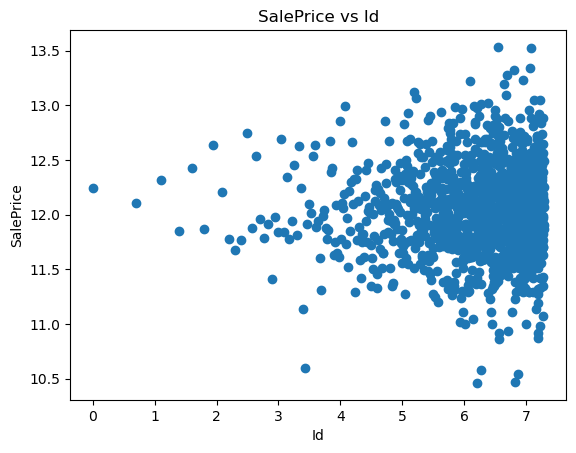

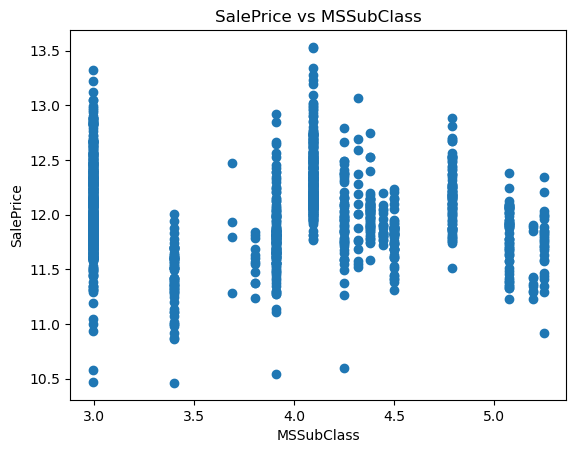

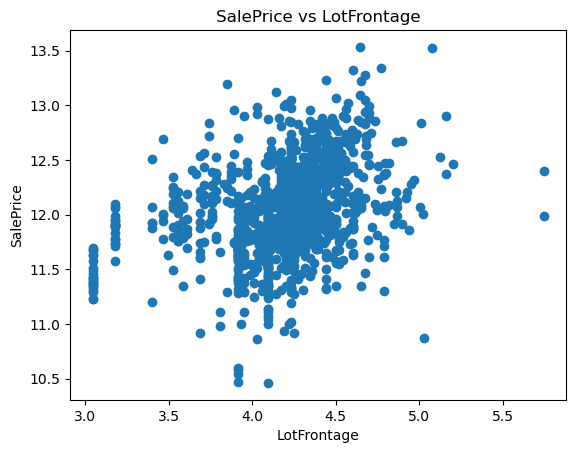

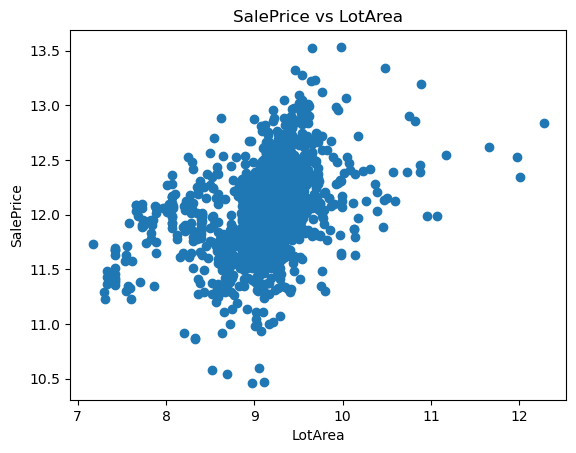

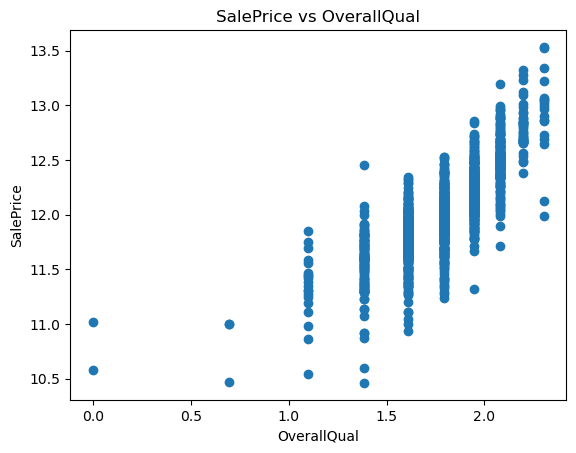

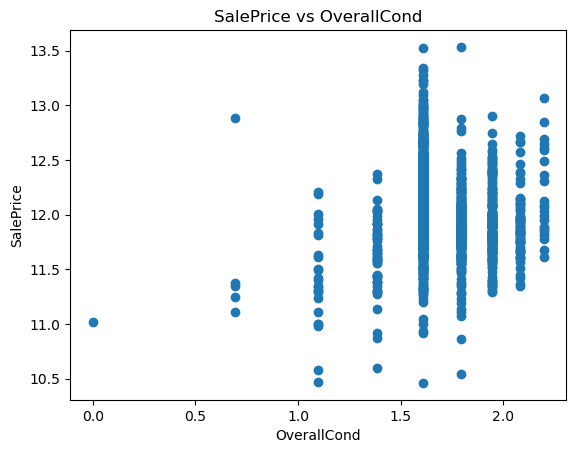

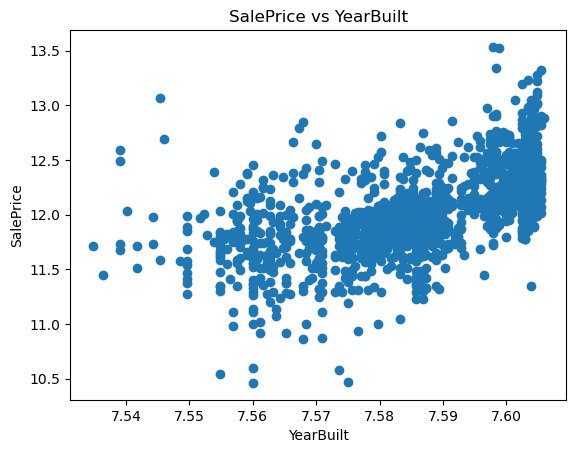

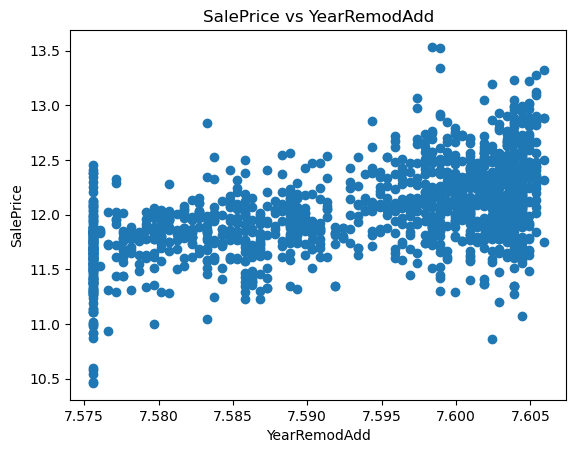

/Users/bhanuvardhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


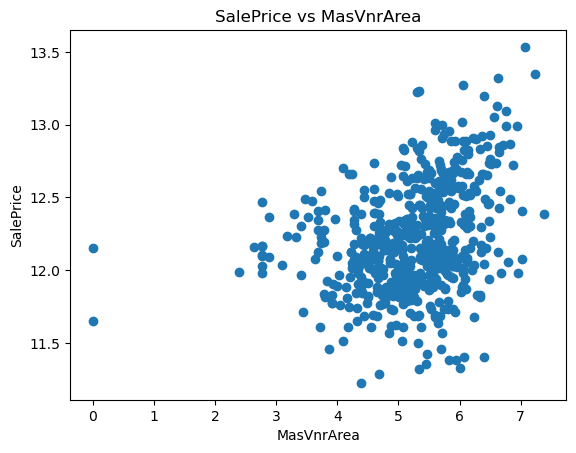

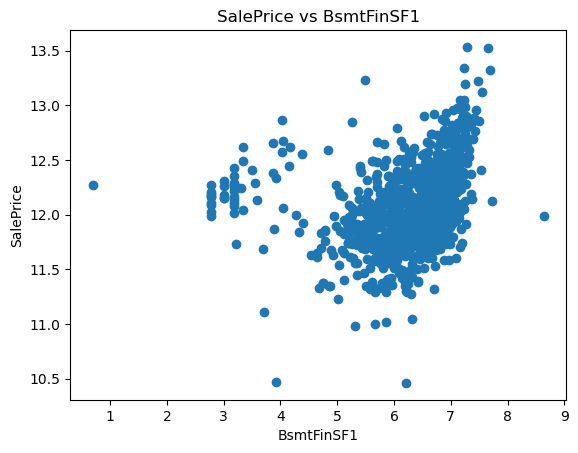

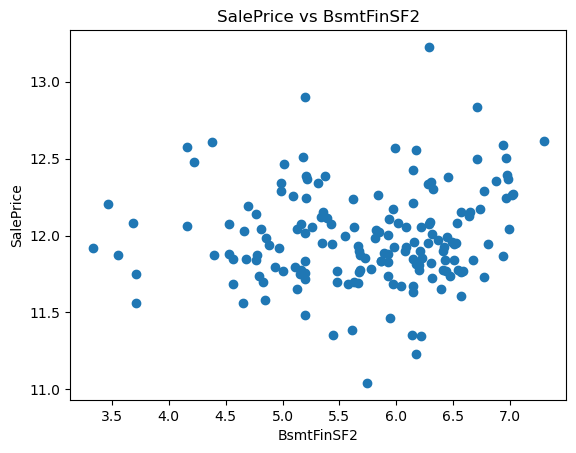

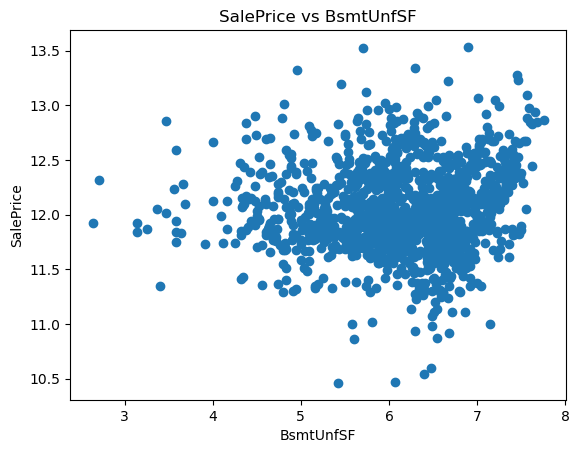

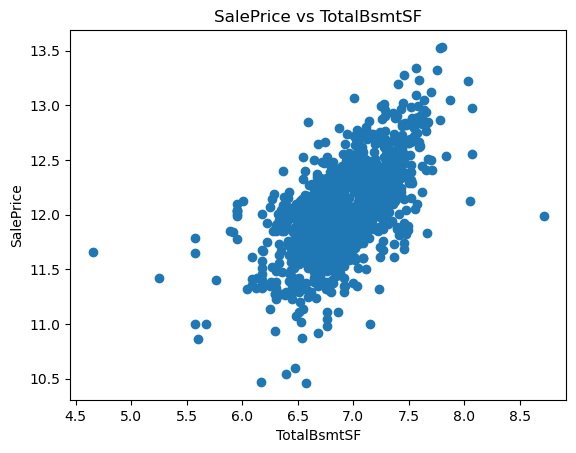

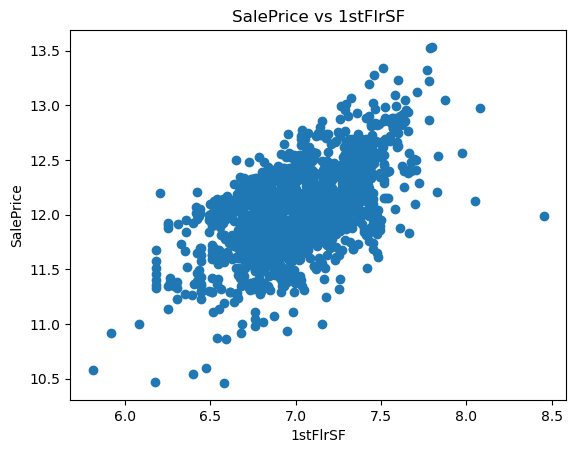

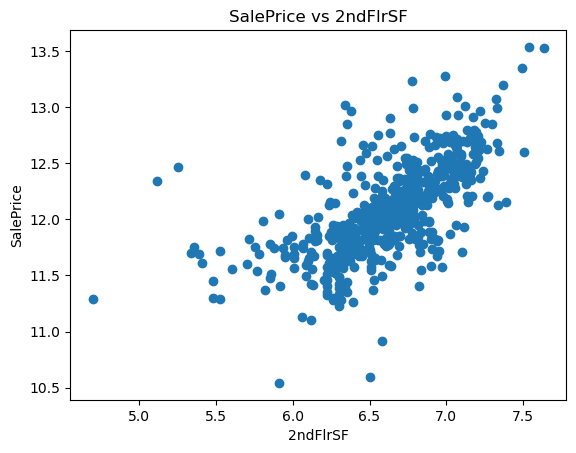

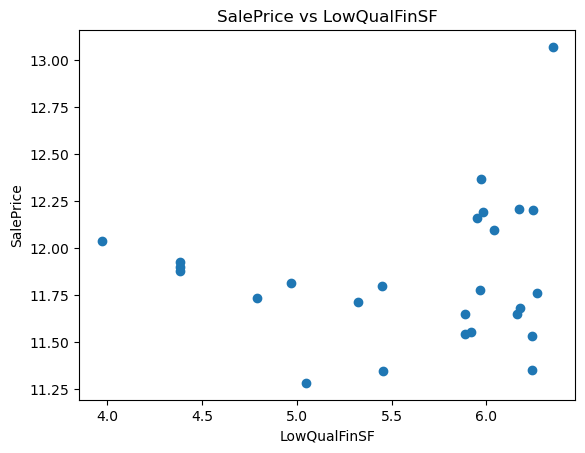

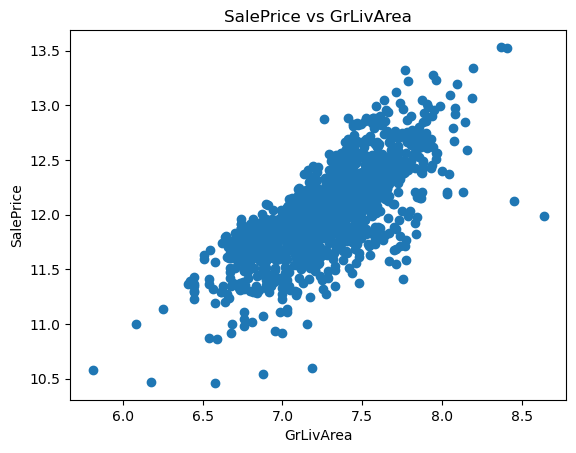

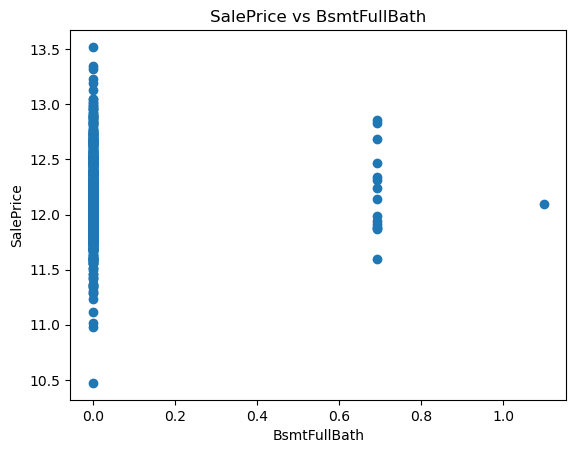

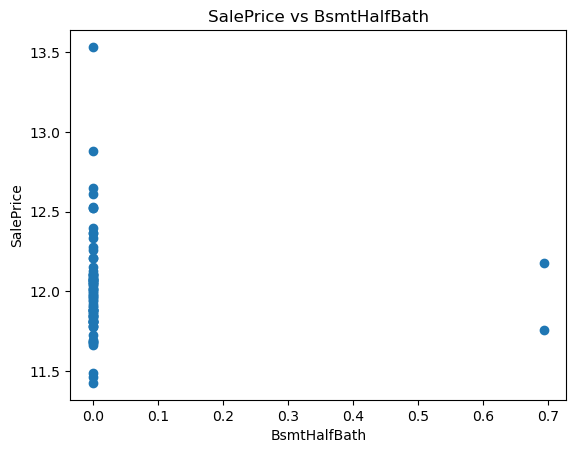

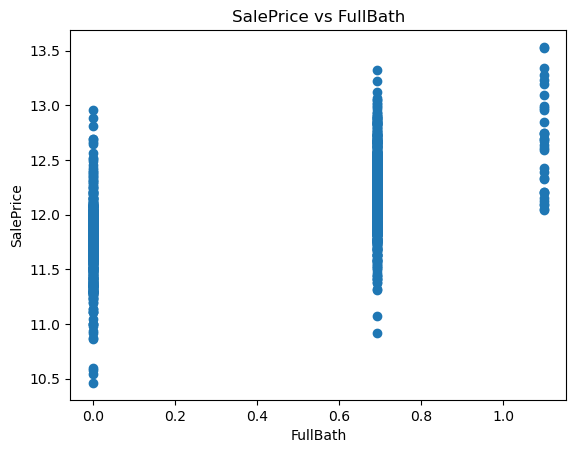

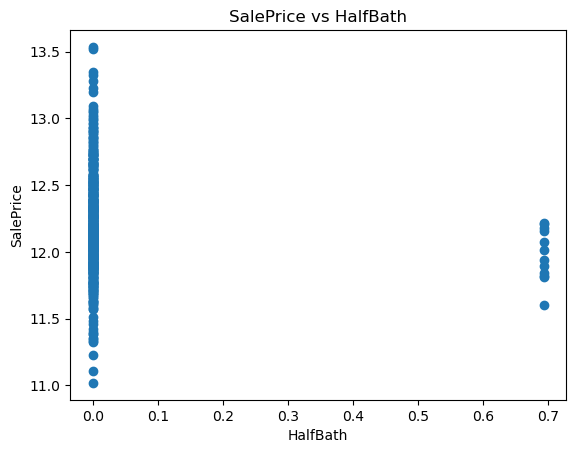

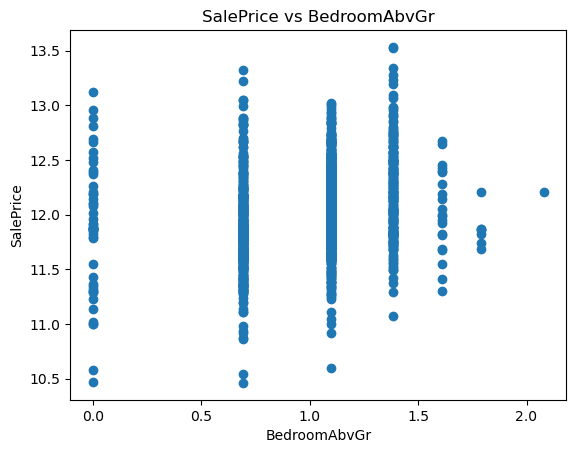

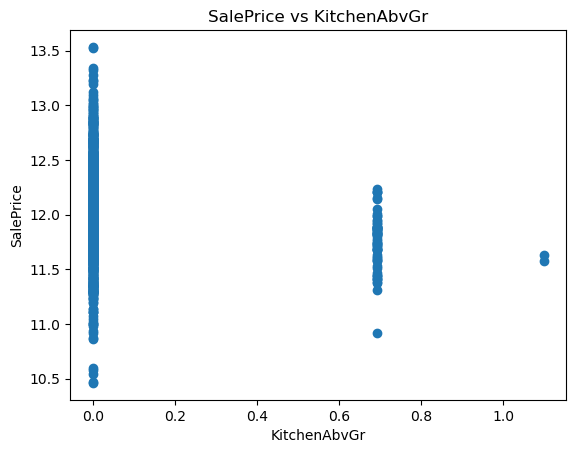

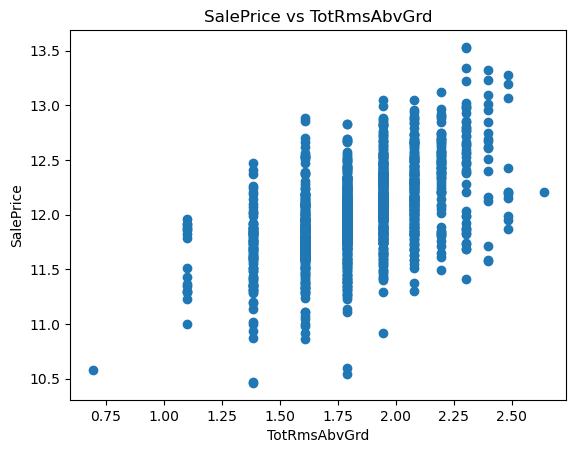

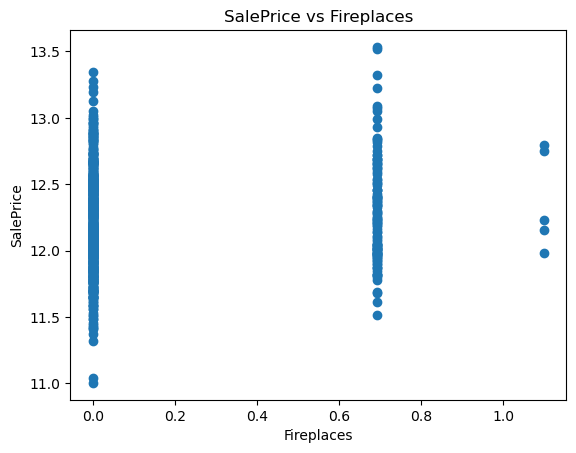

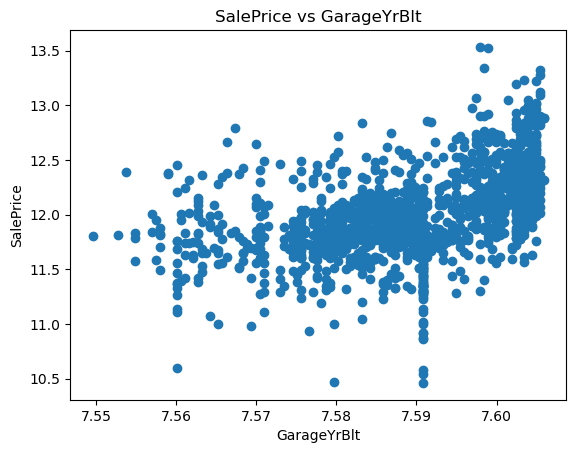

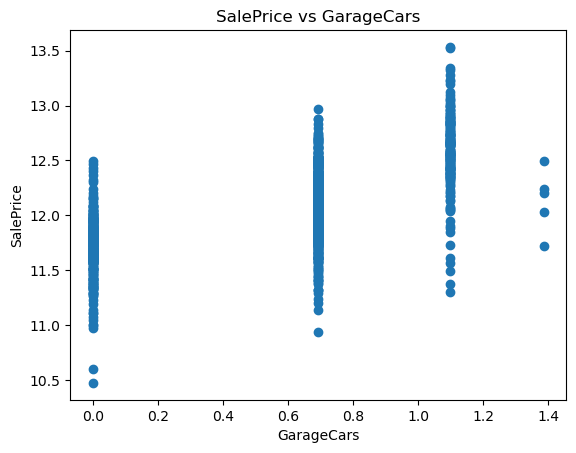

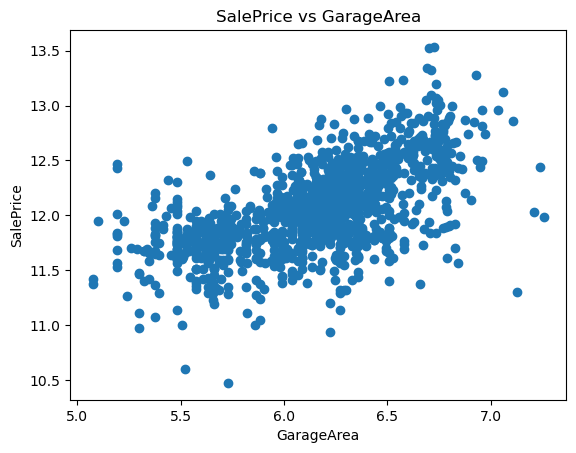

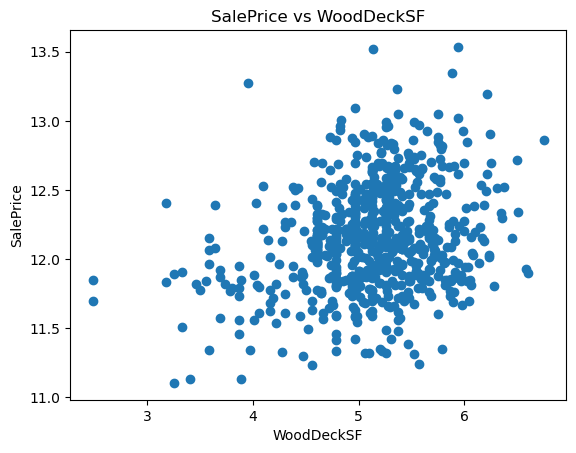

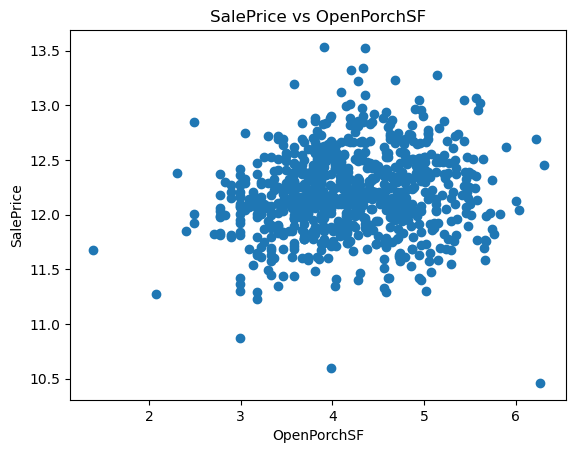

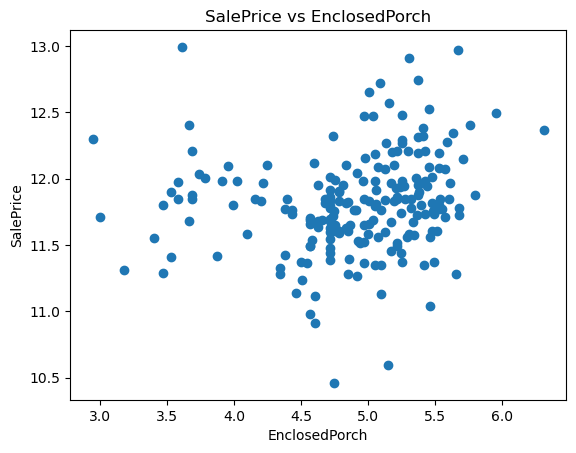

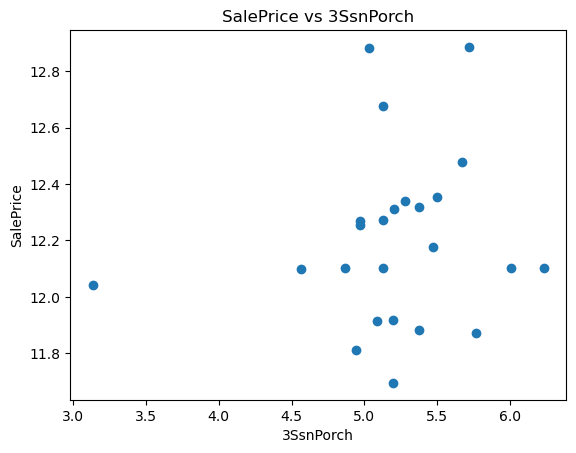

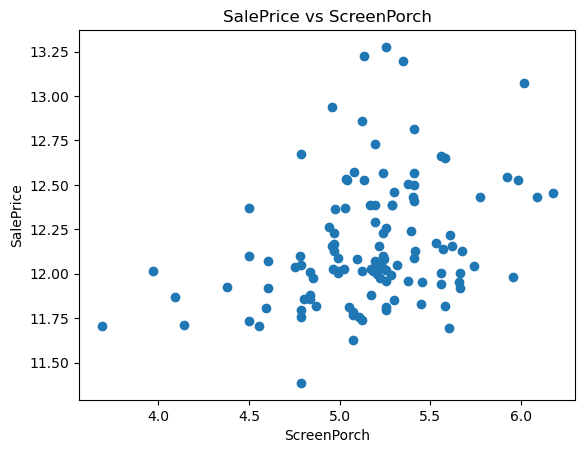

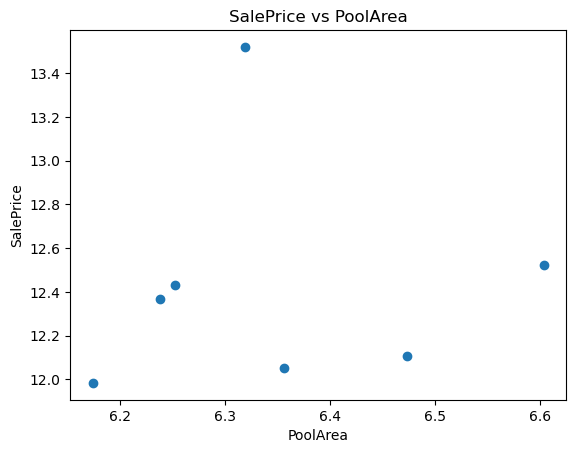

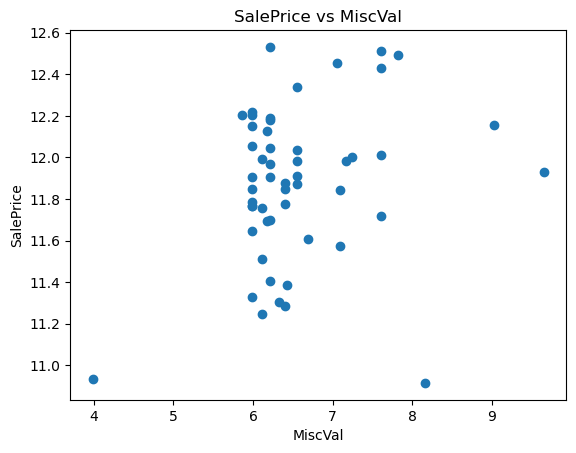

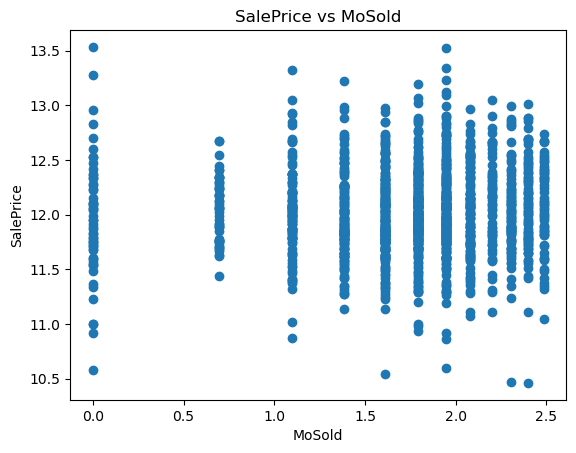

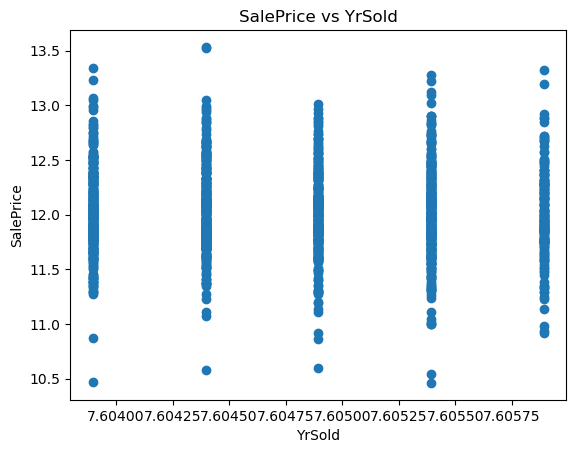

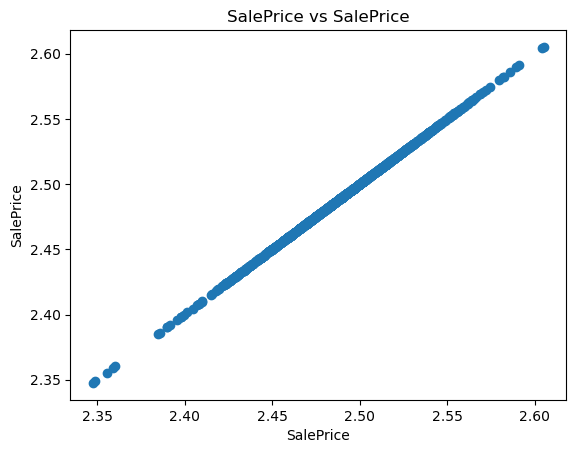

In [72]:
# since now as we removed all the null values from numerical data now we will do log normal distribution

num_col = numerical_data.columns

for col in num_col:
    dataset = data.copy()
    
    dataset[col] = np.log(dataset[col])
    dataset['SalePrice'] = np.log(dataset['SalePrice'])
    
    plt.scatter(dataset[col], dataset['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title('SalePrice vs '+col)
    plt.show()

### Handling Rare Categorical Features

Removing rare categorical variables that are present less than 1% in the observations

In [73]:
cat_col = [col for col in data.columns if data[col].dtype == 'O']

print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [74]:
dataset = data.copy()

for col in cat_col:
    temp = dataset.groupby(col)['SalePrice'].count()/len(dataset)
    temp_df = temp[temp > 0.01].index
    print(temp_df)
    dataset[col] = np.where(dataset[col].isin(temp_df), dataset[col], 'Rare_var')

Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')
Index(['Pave'], dtype='object', name='Street')
Index(['Grvl', 'Pave'], dtype='object', name='Alley')
Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')
Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')
Index(['AllPub'], dtype='object', name='Utilities')
Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')
Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')
Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')
Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')
Index(['Norm'], dtype='object', name='Condition2')
Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype='object',

In [75]:
# convert categorical variables into numerical variables

cat_col = [col for col in data.columns if data[col].dtype == 'O']

for col in cat_col:
    temp = data.groupby(col)['SalePrice'].mean().sort_values().index
    temp_dict = {k:i for i,k in enumerate(temp, 0)}
    data[col] = data[col].map(temp_dict)


### Feature Scaling

In [76]:
feature_scale = [col for col in data.columns if col not in ['Id', 'SalePrice']]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [77]:
# transform the train and test set, and add on the Id and SalePrice variables

X_train = pd.concat([data[['Id', 'SalePrice']].reset_index(drop=True), pd.DataFrame(scaler.transform(data[feature_scale]),columns=feature_scale)], axis=1)

In [78]:
X_train.head(4)

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1     208500    0.235294      0.75     0.150685  0.033420     1.0    NaN   
1   2     181500    0.000000      0.75     0.202055  0.038795     1.0    NaN   
2   3     223500    0.235294      0.75     0.160959  0.046507     1.0    NaN   
3   4     140000    0.294118      0.75     0.133562  0.038561     1.0    NaN   

   LotShape  LandContour  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0  0.000000     0.333333  ...          0.0       0.0     NaN    NaN   
1  0.000000     0.333333  ...          0.0       0.0     NaN    NaN   
2  0.333333     0.333333  ...          0.0       0.0     NaN    NaN   
3  0.333333     0.333333  ...          0.0       0.0     NaN    NaN   

   MiscFeature  MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0          NaN      0.0  0.090909    0.50       0.5            0.8  
1          NaN      0.0  0.363636    0.25       0.5            0.8  
2          NaN      0.0  0.727273    0.50       0.5            0.8  
3          NaN      0.0  0.090909    0.00       0.5            0.2  

[4 rows x 81 columns]